<a href="https://colab.research.google.com/github/BooEiEi/Predicting-Technology-Sector-Stock-Prices/blob/main/New_Model_Predict_StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Downgrade sklearn version

In [2]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


In [3]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 122.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [ ]:
import os
os._exit(00)

#DATA

In [1]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF4'
path_Test = '/content/drive/My Drive/master project/data/DF_Test_New'

Mounted at /content/drive


In [2]:
!pip install scikeras

In [3]:
import tensorflow as tf
import sklearn
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, InputLayer, GRU, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score

In [4]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [5]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])
df_META = df_META.sort_values('date').reset_index(drop=True)

In [6]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])
df_AAPL = df_AAPL.sort_values('date').reset_index(drop=True)

In [7]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])
df_MSFT = df_MSFT.sort_values('date').reset_index(drop=True)

In [8]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])
df_NVDA = df_NVDA.sort_values('date').reset_index(drop=True)

In [9]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])
df_GOOG = df_GOOG.sort_values('date').reset_index(drop=True)

#Normalized

In [10]:
train_size = int(len(df_META) * 0.75)
test_size = len(df_META) - train_size

In [11]:
scaler = MinMaxScaler()

In [12]:
X_META = df_META[["S&P500","CPI","Interest","US_inflation_rate", "NASDAQ"]]
y_META = df_META["Stockprice_META"]

In [13]:
X_AAPL = df_AAPL[["S&P500","CPI", "NASDAQ"]]
y_AAPL = df_AAPL["Stockprice_AAPL"]

In [14]:
X_GOOG = df_GOOG[["S&P500", "Gold", "CPI", "Interest", "UNEMPLOYMENT", "NASDAQ"]]
y_GOOG = df_GOOG["Stockprice_GOOGL"]

In [15]:
X_NVDA = df_NVDA[["S&P500", "BTC", "CPI", "Gold","US_inflation_rate", "NASDAQ"]]
y_NVDA = df_NVDA["Stockprice_NVDA"]

In [16]:
X_MSFT = df_MSFT[["S&P500","CPI","Interest","US_inflation_rate", "NASDAQ"]]
y_MSFT = df_MSFT["Stockprice_MSFT"]

In [17]:
Xtrain_META, XTest_META = X_META.iloc[:train_size], X_META.iloc[train_size:] # ข้อมูล train
ytrain_META, yTest_META = y_META.iloc[:train_size], y_META.iloc[train_size:] # ข้อมูล test

In [18]:
Xtrain_AAPL, XTest_AAPL = X_AAPL.iloc[:train_size], X_AAPL.iloc[train_size:] # ข้อมูล train
ytrain_AAPL, yTest_AAPL = y_AAPL.iloc[:train_size], y_AAPL.iloc[train_size:] # ข้อมูล test

In [19]:
Xtrain_GOOG, XTest_GOOG = X_GOOG.iloc[:train_size], X_GOOG.iloc[train_size:] # ข้อมูล train
ytrain_GOOG, yTest_GOOG = y_GOOG.iloc[:train_size], y_GOOG.iloc[train_size:] # ข้อมูล test

In [20]:
Xtrain_MSFT, XTest_MSFT = X_MSFT.iloc[:train_size], X_MSFT.iloc[train_size:] # ข้อมูล train
ytrain_MSFT, yTest_MSFT = y_MSFT.iloc[:train_size], y_MSFT.iloc[train_size:] # ข้อมูล test

In [21]:
Xtrain_NVDA, XTest_NVDA = X_NVDA.iloc[:train_size], X_NVDA.iloc[train_size:] # ข้อมูล train
ytrain_NVDA, yTest_NVDA = y_NVDA.iloc[:train_size], y_NVDA.iloc[train_size:] # ข้อมูล test

In [22]:
Xtrain_META = scaler.fit_transform(Xtrain_META)
XTest_META =  scaler.transform(XTest_META)

In [23]:
Xtrain_AAPL = scaler.fit_transform(Xtrain_AAPL)
XTest_AAPL = scaler.transform(XTest_AAPL)

In [24]:
Xtrain_GOOG = scaler.fit_transform(Xtrain_GOOG)
XTest_GOOG = scaler.transform(XTest_GOOG)

In [25]:
Xtrain_MSFT = scaler.fit_transform(Xtrain_MSFT)
XTest_MSFT = scaler.transform(XTest_MSFT)

In [26]:
Xtrain_NVDA = scaler.fit_transform(Xtrain_NVDA)
XTest_NVDA = scaler.transform(XTest_NVDA)

In [27]:
date_test = df_META['date'].iloc[train_size:]

#Lightgbm

In [28]:
def model_lightgbm(X_train, y_train, X_test, y_test, feature_fraction, learning_rate,
                    max_bin, max_depth, min_data_in_leaf, n_estimators,
                   date_test, date_train, label_name='Dataset'):

    params = {
    'feature_fraction': feature_fraction,
    'learning_rate': learning_rate ,
    'max_bin': max_bin,
    'max_depth': max_depth,
    'min_data_in_leaf': min_data_in_leaf,
    'n_estimators': n_estimators,
    }
    model = LGBMRegressor(**params, verbosity=-1,random_state=42)
    model.fit(X_train, y_train)
    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # ===== Test Metrics =====
    y_pred = model.predict(X_test)

    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
        'date': date_test,
        'actual': y_test,
        'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GMB_{label_name}.csv'))
    return model, df_result

##META

-----------------------------
Train
R2 Value Train:  0.9960
MSE Train:       53.6280
RMSE Train:      7.3231
MAE Train:       4.4151
MAPE Train:      0.0177
-----------------------------


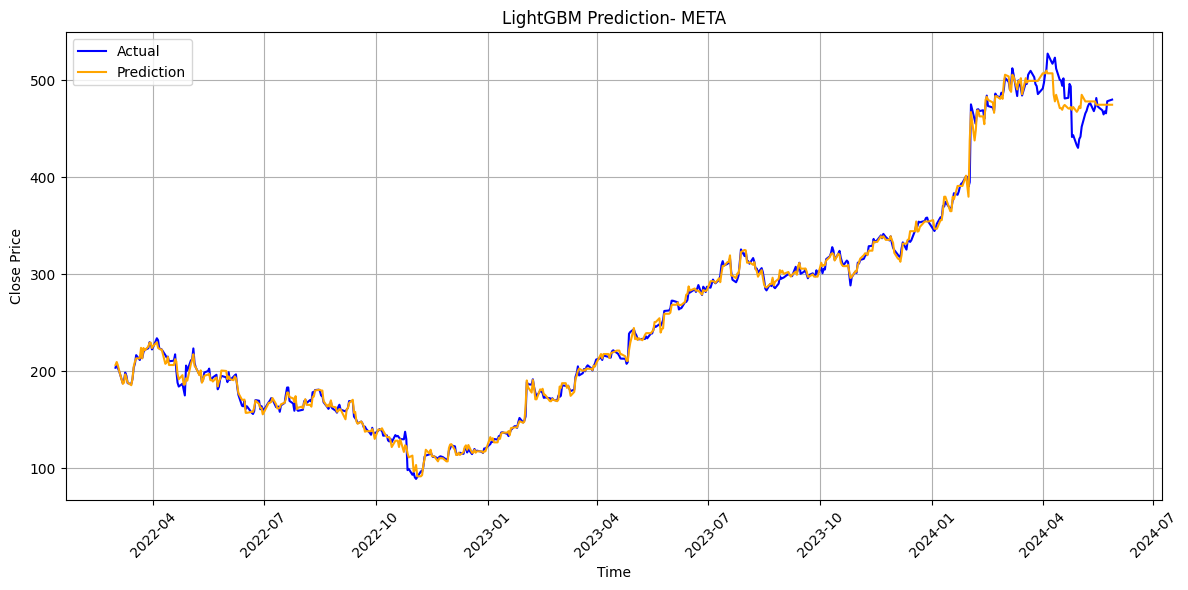

-----------------------------
Test
R2 Value Test:  -1.3559
MSE Test:       10443.1452
RMSE Test:      7.3231
MAE Test:       78.8504
MAPE:           0.1284
-----------------------------


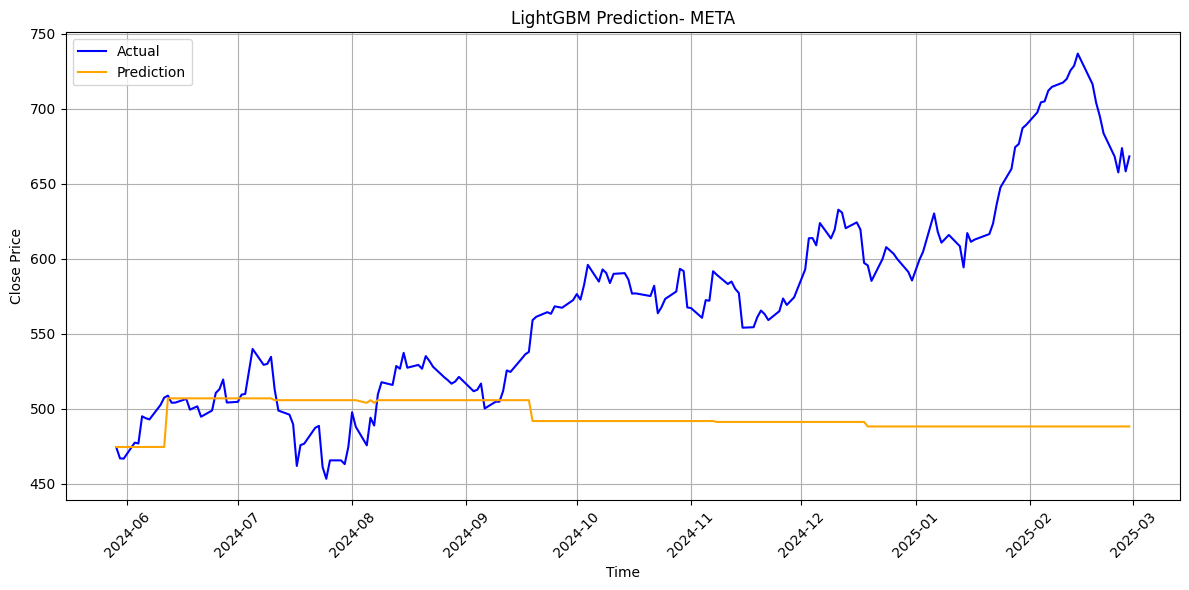

(LGBMRegressor(feature_fraction=0.7, learning_rate=0.2, max_bin=50, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  474.36  474.615420
 565 2024-05-30  467.05  474.615420
 566 2024-05-31  466.83  474.615420
 567 2024-06-03  477.49  474.615420
 568 2024-06-04  476.99  474.615420
 ..         ...     ...         ...
 748 2025-02-24  668.13  488.286574
 749 2025-02-25  657.50  488.286574
 750 2025-02-26  673.70  488.286574
 751 2025-02-27  658.24  488.286574
 752 2025-02-28  668.20  488.286574
 
 [189 rows x 3 columns])

In [29]:
model_lightgbm(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    feature_fraction=0.7,
    learning_rate=0.2,
    max_bin=50,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

-----------------------------
Train
R2 Value Train:  0.9865
MSE Train:       4.4302
RMSE Train:      2.1048
MAE Train:       1.3313
MAPE Train:      0.0080
-----------------------------


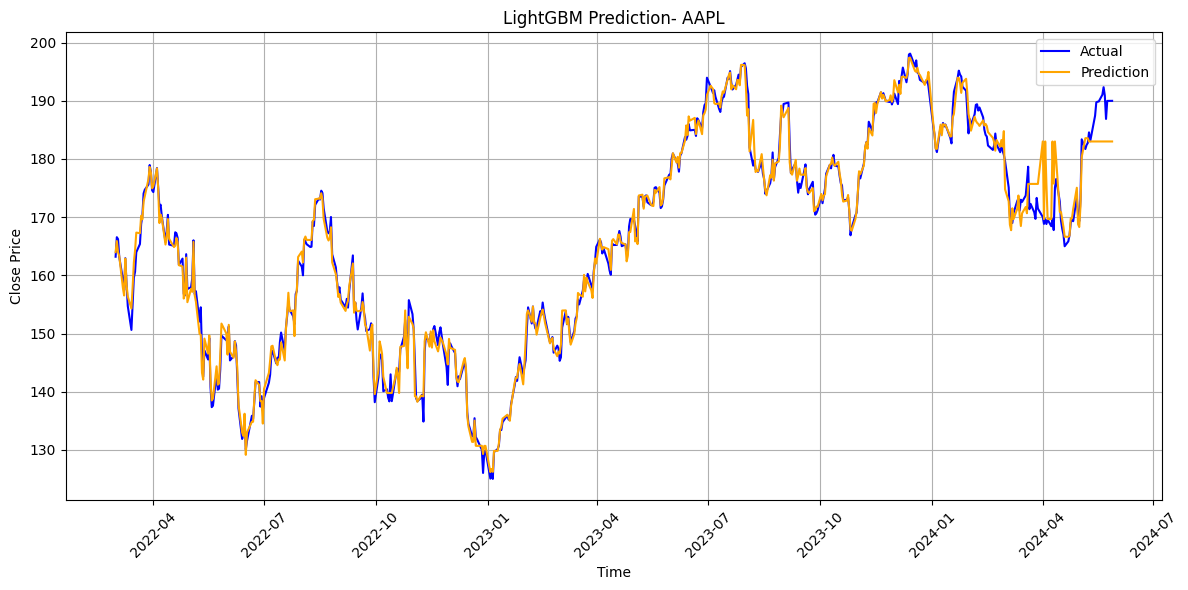

-----------------------------
Test
R2 Value Test:  -11.4152
MSE Test:       2207.8549
RMSE Test:      2.1048
MAE Test:       45.0849
MAPE:           0.1949
-----------------------------


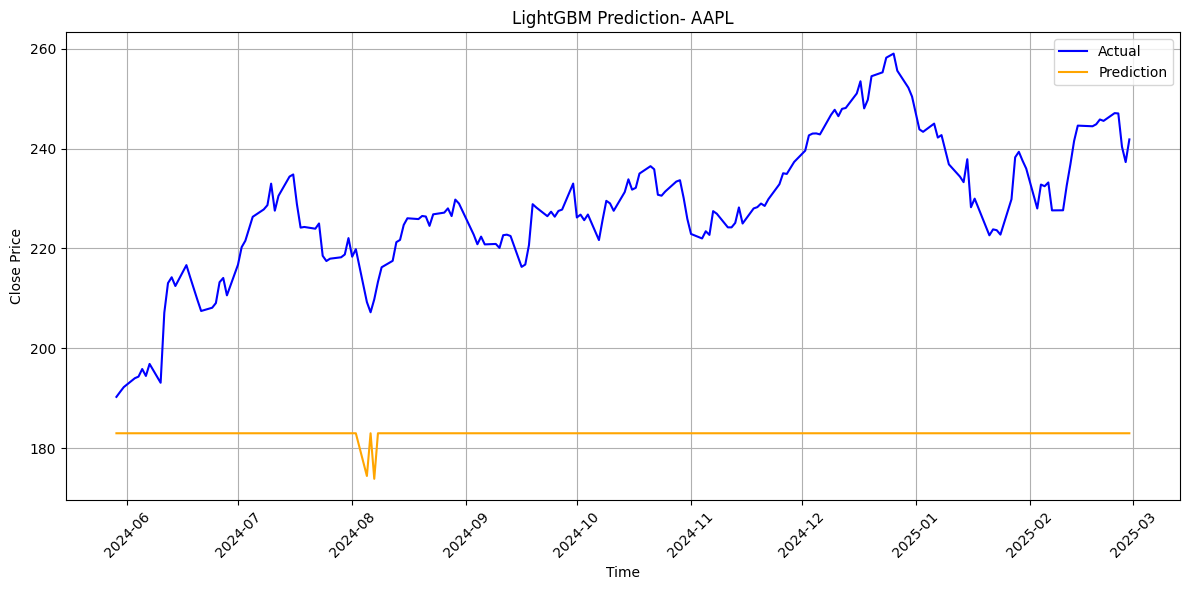

(LGBMRegressor(feature_fraction=0.5, learning_rate=0.2, max_bin=200, max_depth=7,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  190.29  183.008477
 565 2024-05-30  191.29  183.008477
 566 2024-05-31  192.25  183.008477
 567 2024-06-03  194.03  183.008477
 568 2024-06-04  194.35  183.008477
 ..         ...     ...         ...
 748 2025-02-24  247.10  183.008477
 749 2025-02-25  247.04  183.008477
 750 2025-02-26  240.36  183.008477
 751 2025-02-27  237.30  183.008477
 752 2025-02-28  241.84  183.008477
 
 [189 rows x 3 columns])

In [30]:
model_lightgbm(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    feature_fraction=0.5,
    learning_rate=0.2,
    max_bin=200,
    max_depth=7,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

-----------------------------
Train
R2 Value Train:  0.9983
MSE Train:       6.2726
RMSE Train:      2.5045
MAE Train:       1.8246
MAPE Train:      0.0060
-----------------------------


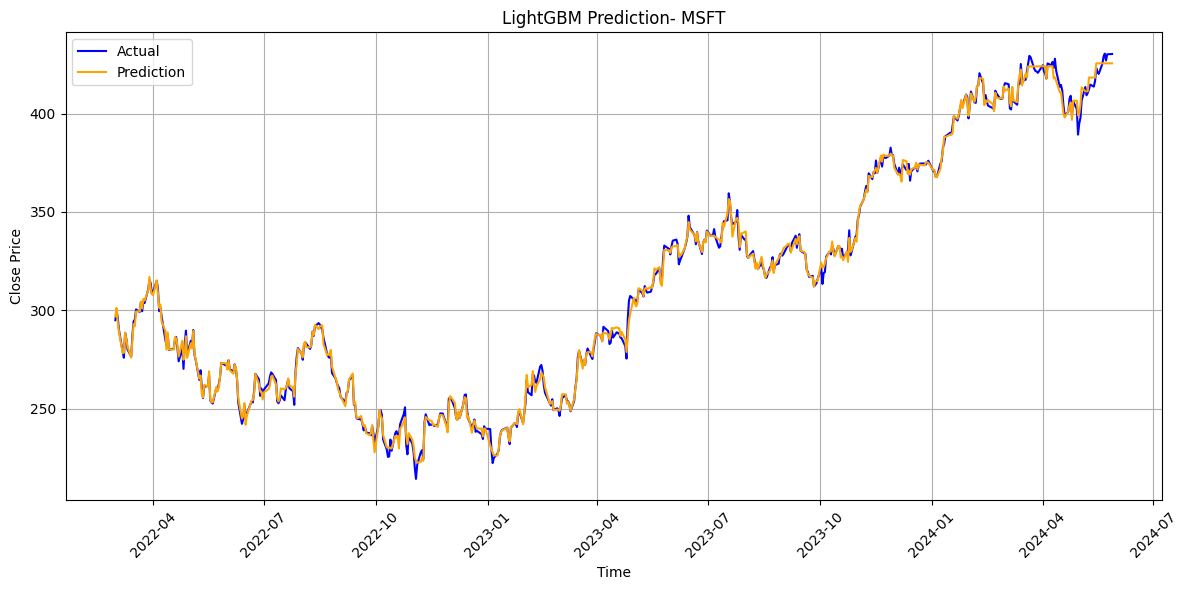

-----------------------------
Test
R2 Value Test:  -1.8136
MSE Test:       684.4315
RMSE Test:      2.5045
MAE Test:       22.2764
MAPE:           0.0515
-----------------------------


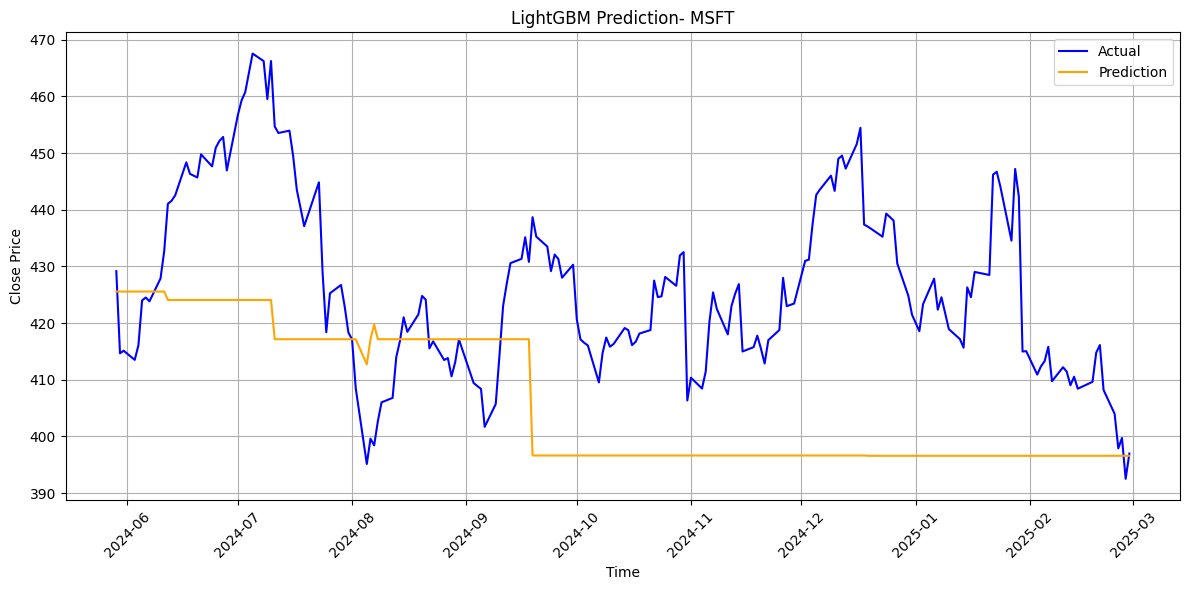

(LGBMRegressor(feature_fraction=0.7, learning_rate=0.2, max_bin=400, max_depth=5,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  429.17  425.573761
 565 2024-05-30  414.67  425.573761
 566 2024-05-31  415.13  425.573761
 567 2024-06-03  413.52  425.573761
 568 2024-06-04  416.07  425.573761
 ..         ...     ...         ...
 748 2025-02-24  404.00  396.591038
 749 2025-02-25  397.90  396.591038
 750 2025-02-26  399.73  396.591038
 751 2025-02-27  392.53  396.591038
 752 2025-02-28  396.99  396.591038
 
 [189 rows x 3 columns])

In [31]:
model_lightgbm(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    feature_fraction=0.7,
    learning_rate=0.2,
    max_bin=400,
    max_depth=5,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

-----------------------------
Train
R2 Value Train:  0.9982
MSE Train:       1.0400
RMSE Train:      1.0198
MAE Train:       0.5466
MAPE Train:      0.0158
-----------------------------


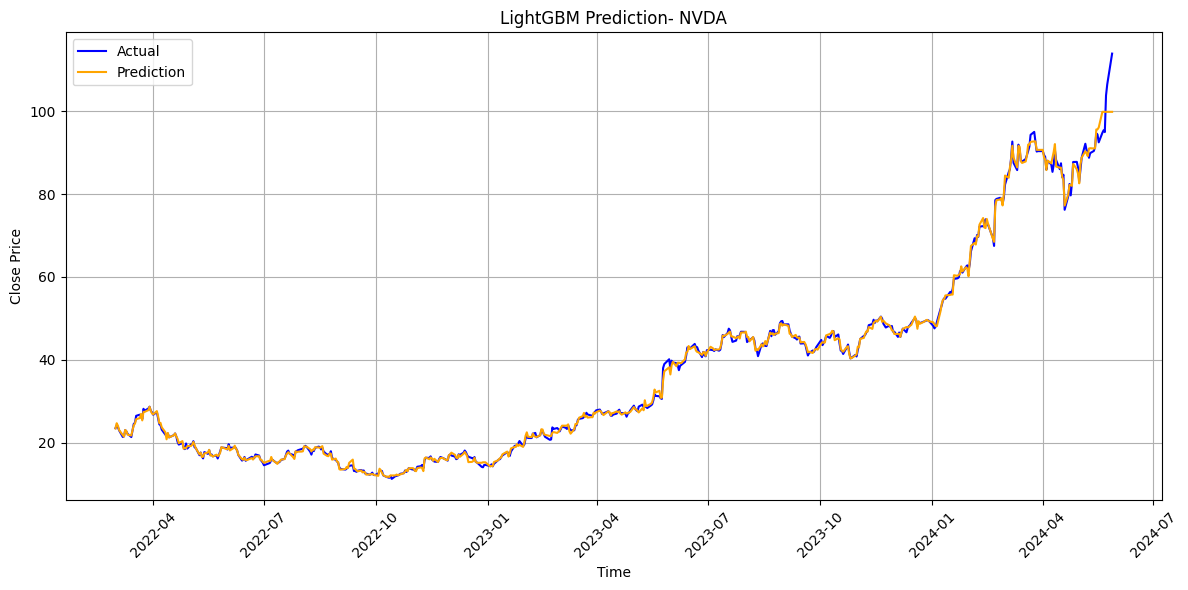

-----------------------------
Test
R2 Value Test:  -11.6610
MSE Test:       1698.2019
RMSE Test:      1.0198
MAE Test:       39.3998
MAPE:           0.3006
-----------------------------


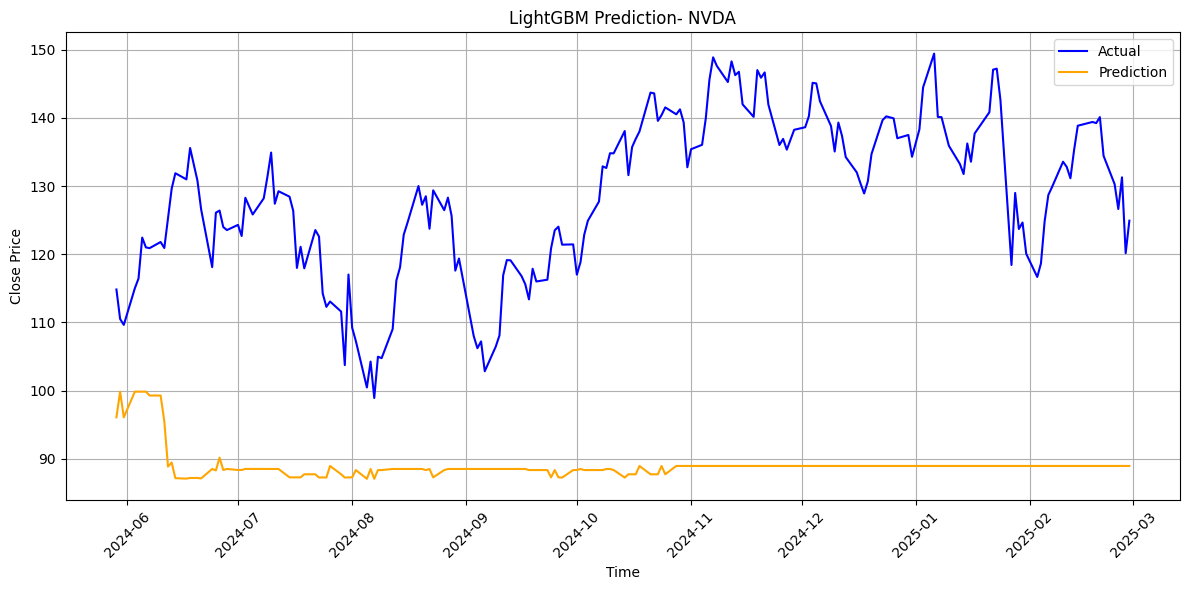

(LGBMRegressor(feature_fraction=0.8, learning_rate=0.2, max_bin=100, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date   actual  prediction
 564 2024-05-29  114.825   96.061937
 565 2024-05-30  110.500   99.838190
 566 2024-05-31  109.633   96.061937
 567 2024-06-03  115.000   99.838190
 568 2024-06-04  116.437   99.838190
 ..         ...      ...         ...
 748 2025-02-24  130.280   88.937360
 749 2025-02-25  126.630   88.937360
 750 2025-02-26  131.280   88.937360
 751 2025-02-27  120.150   88.937360
 752 2025-02-28  124.920   88.937360
 
 [189 rows x 3 columns])

In [32]:
model_lightgbm(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    feature_fraction=0.8,
    learning_rate=0.2,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

-----------------------------
Train
R2 Value Train:  0.9873
MSE Train:       5.4202
RMSE Train:      2.3281
MAE Train:       1.6622
MAPE Train:      0.0136
-----------------------------


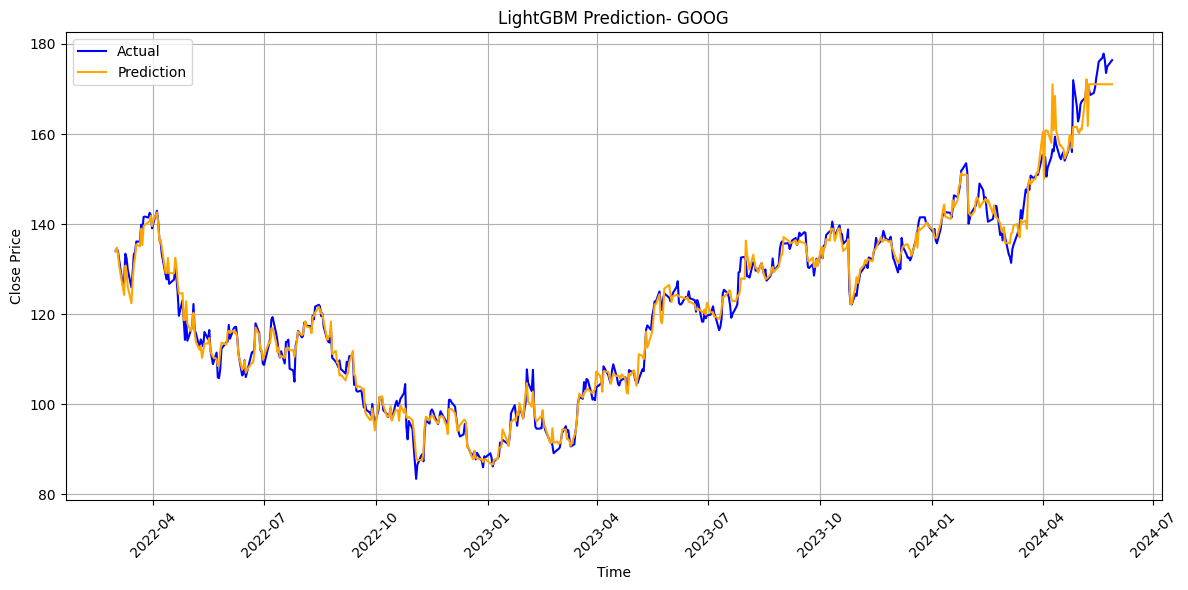

-----------------------------
Test
R2 Value Test:  -0.1946
MSE Test:       194.0779
RMSE Test:      2.3281
MAE Test:       11.0320
MAPE:           0.0608
-----------------------------


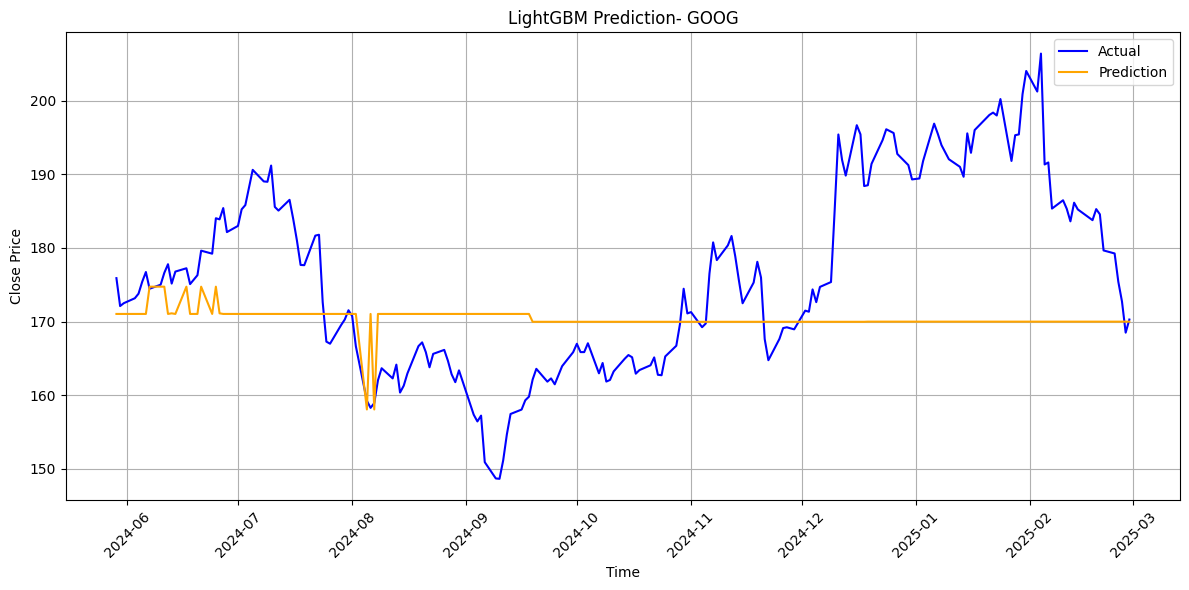

(LGBMRegressor(feature_fraction=0.6, max_bin=100, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  175.90  171.040485
 565 2024-05-30  172.11  171.040485
 566 2024-05-31  172.50  171.040485
 567 2024-06-03  173.17  171.040485
 568 2024-06-04  173.79  171.040485
 ..         ...     ...         ...
 748 2025-02-24  179.25  169.994739
 749 2025-02-25  175.42  169.994739
 750 2025-02-26  172.73  169.994739
 751 2025-02-27  168.50  169.994739
 752 2025-02-28  170.28  169.994739
 
 [189 rows x 3 columns])

In [33]:
model_lightgbm(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    feature_fraction=0.6,
    learning_rate=0.1,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#XGBoost

In [34]:
def model_XGBoost(X_train, y_train, X_test, y_test, learning_rate, max_depth,
                   alpha, reg_lambda, n_estimators, min_child_weight, colsample_bytree,
                   date_test, date_train, label_name='Dataset'):

    params = {
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': alpha,
        'reg_lambda' : reg_lambda,
        'n_estimators' : n_estimators,
        'min_child_weight' : min_child_weight,
        'colsample_bytree' : colsample_bytree,
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)


    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'XGBoost Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_XGB_{label_name}.csv'))
    return model, df_result

##META

-----------------------------
Train
R2 Value Train:  0.9978
MSE Train:       29.7595
RMSE Train:      5.4552
MAE Train:       3.9361
MAPE Train:      0.0171
-----------------------------


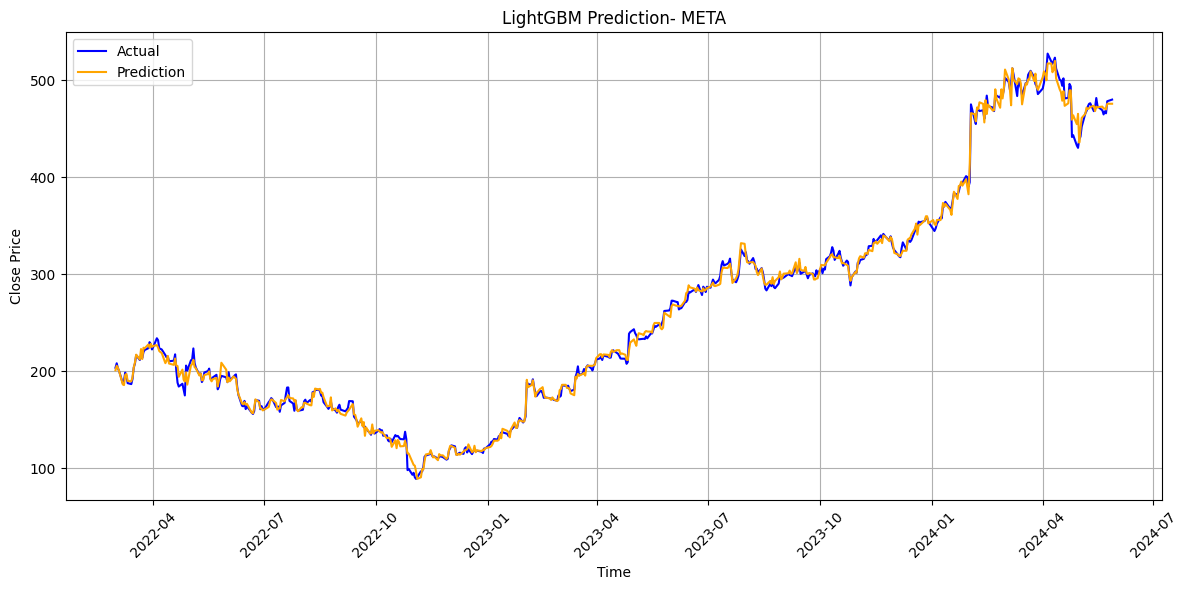

-----------------------------
Test
R2 Value Test:  -5.2098
MSE Test:       27526.4856
RMSE Test:      165.9111
MAE Test:       136.4754
MAPE:           0.2247
-----------------------------


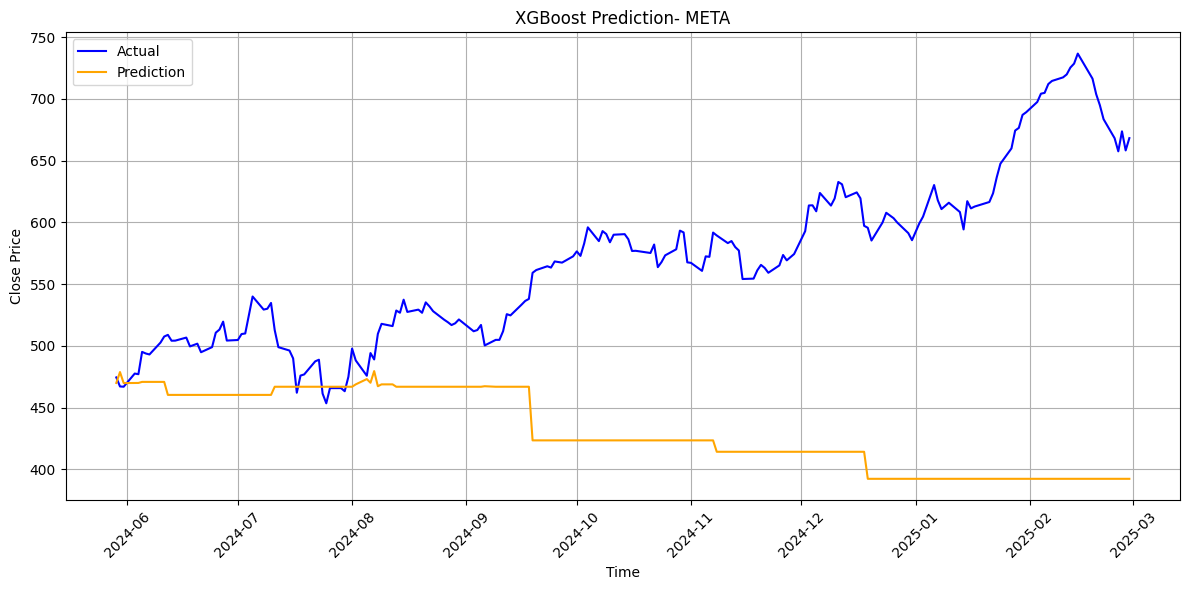

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  474.36  469.888031
 565 2024-05-30  467.05  478.708954
 566 2024-05-31  466.83  469.784210
 567 2024-06-03  477.49  469.888031
 568 2024-06-04  476.99  469.888031
 ..         ...     ...         ...
 748 202

In [35]:
model_XGBoost(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    learning_rate = 0.1,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.1,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

-----------------------------
Train
R2 Value Train:  0.9883
MSE Train:       3.8415
RMSE Train:      1.9600
MAE Train:       1.4663
MAPE Train:      0.0089
-----------------------------


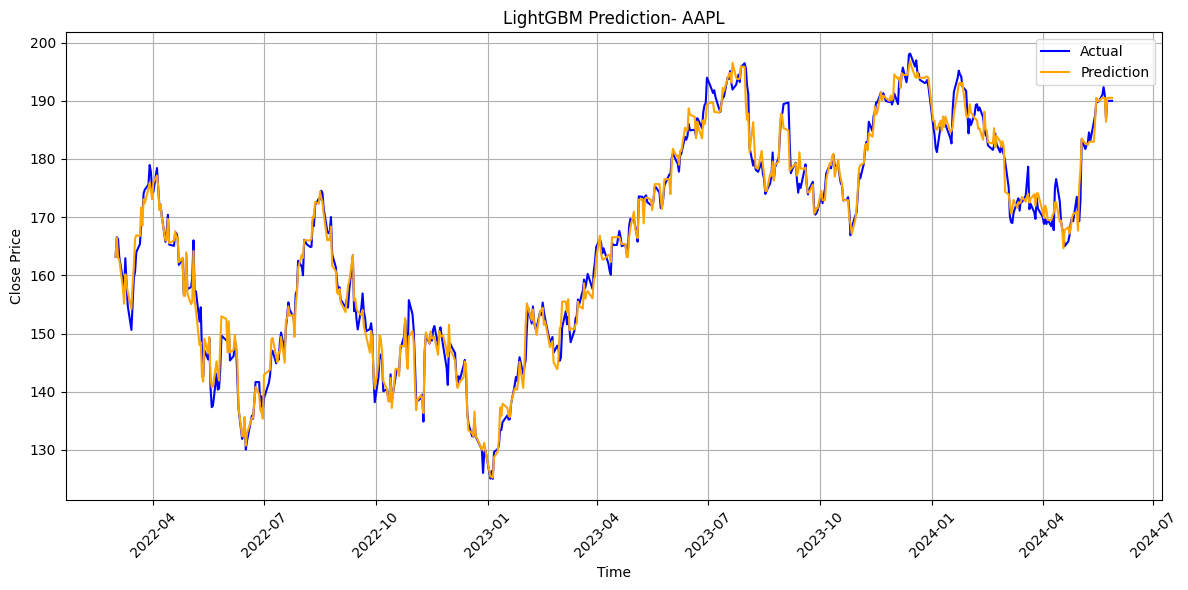

-----------------------------
Test
R2 Value Test:  -7.9438
MSE Test:       1590.5230
RMSE Test:      39.8814
MAE Test:       37.7440
MAPE:           0.1627
-----------------------------


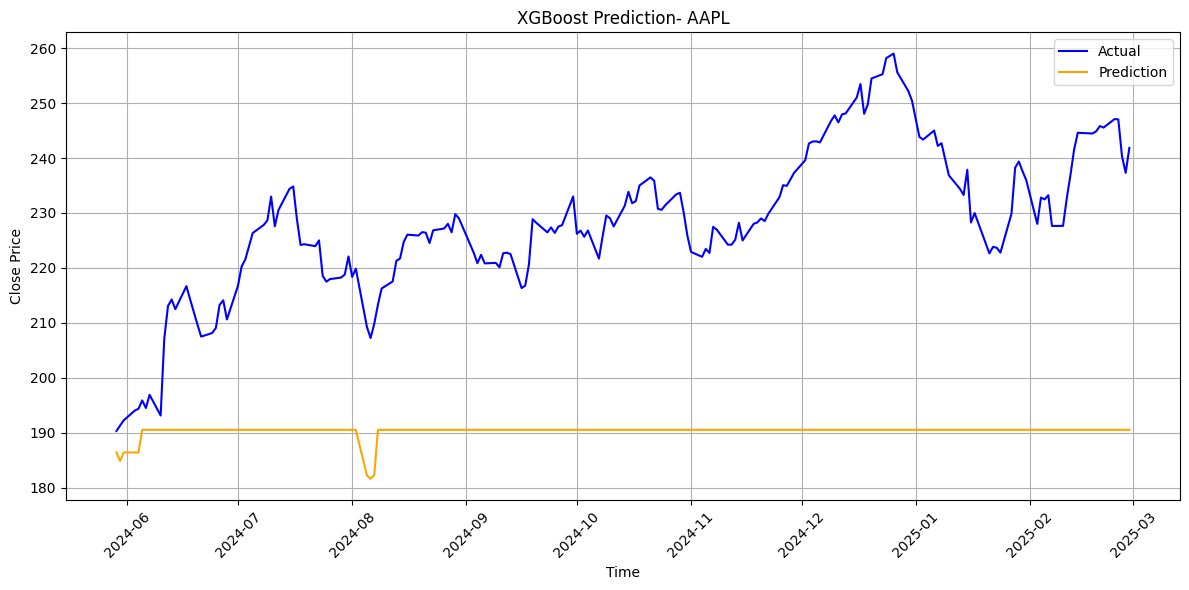

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  190.29  186.393341
 565 2024-05-30  191.29  184.840683
 566 2024-05-31  192.25  186.393341
 567 2024-06-03  194.03  186.393341
 568 2024-06-04  194.35  186.393341
 ..         ...     ...         ...
 748 202

In [36]:
model_XGBoost(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 10,
    n_estimators = 600,
    min_child_weight = 5,
    colsample_bytree = 0.1,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

-----------------------------
Train
R2 Value Train:  0.9993
MSE Train:       2.4074
RMSE Train:      1.5516
MAE Train:       1.1595
MAPE Train:      0.0038
-----------------------------


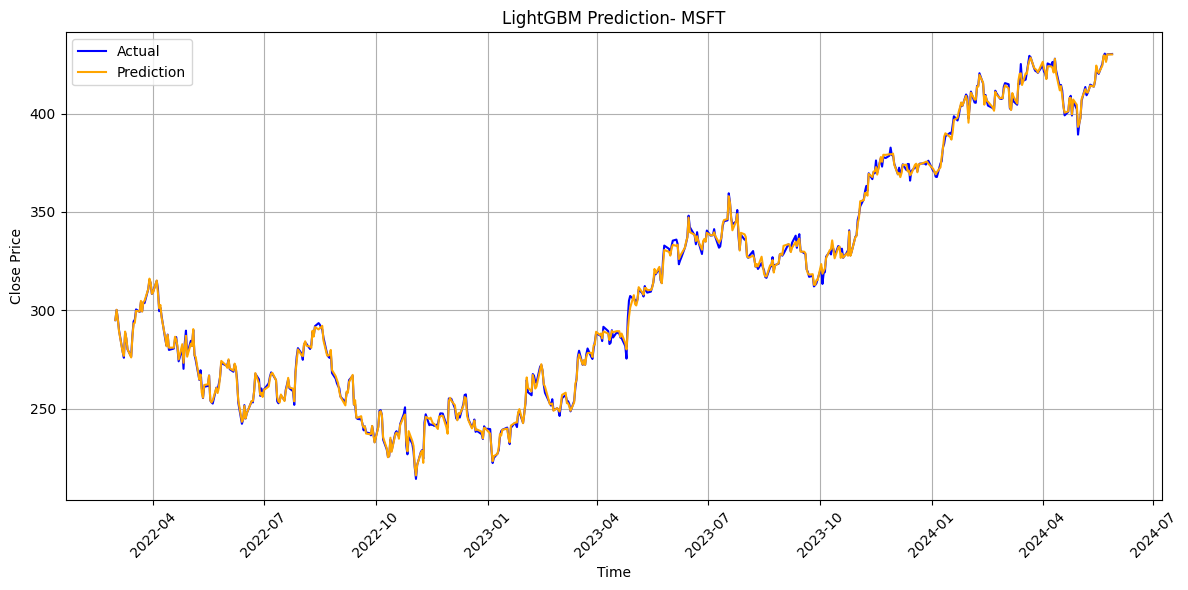

-----------------------------
Test
R2 Value Test:  -1.6419
MSE Test:       642.6758
RMSE Test:      25.3511
MAE Test:       21.5001
MAPE:           0.0497
-----------------------------


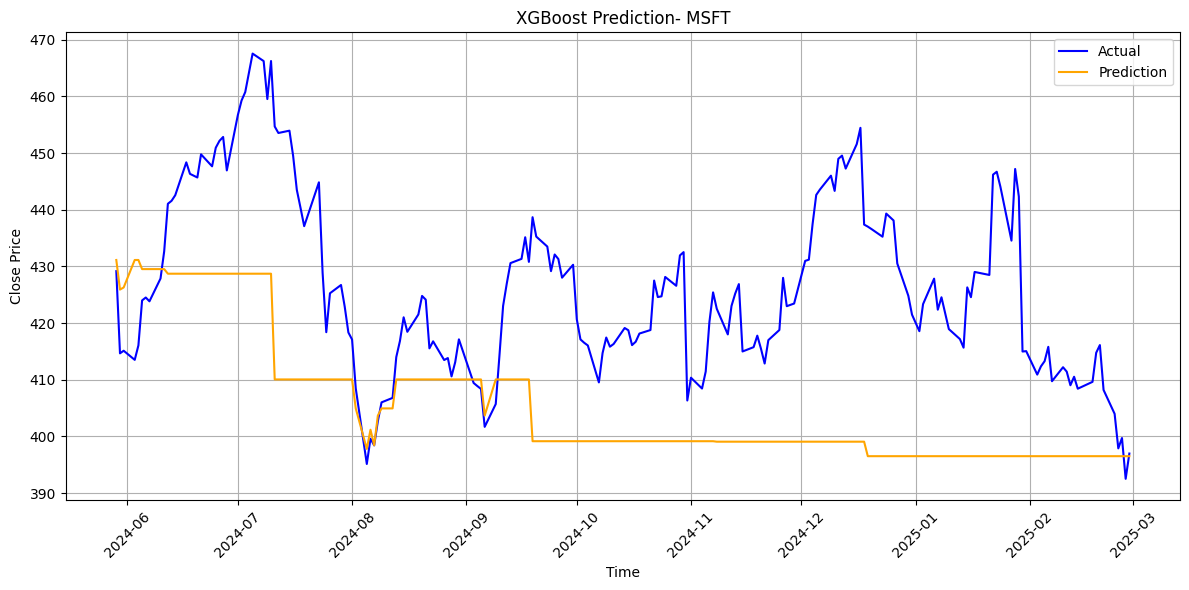

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  429.17  431.143066
 565 2024-05-30  414.67  425.919037
 566 2024-05-31  415.13  426.292786
 567 2024-06-03  413.52  431.143066
 568 2024-06-04  416.07  431.143066
 ..         ...     ...         ...
 748 202

In [37]:
model_XGBoost(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    learning_rate = 0.1,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

-----------------------------
Train
R2 Value Train:  1.0000
MSE Train:       0.0000
RMSE Train:      0.0018
MAE Train:       0.0013
MAPE Train:      0.0001
-----------------------------


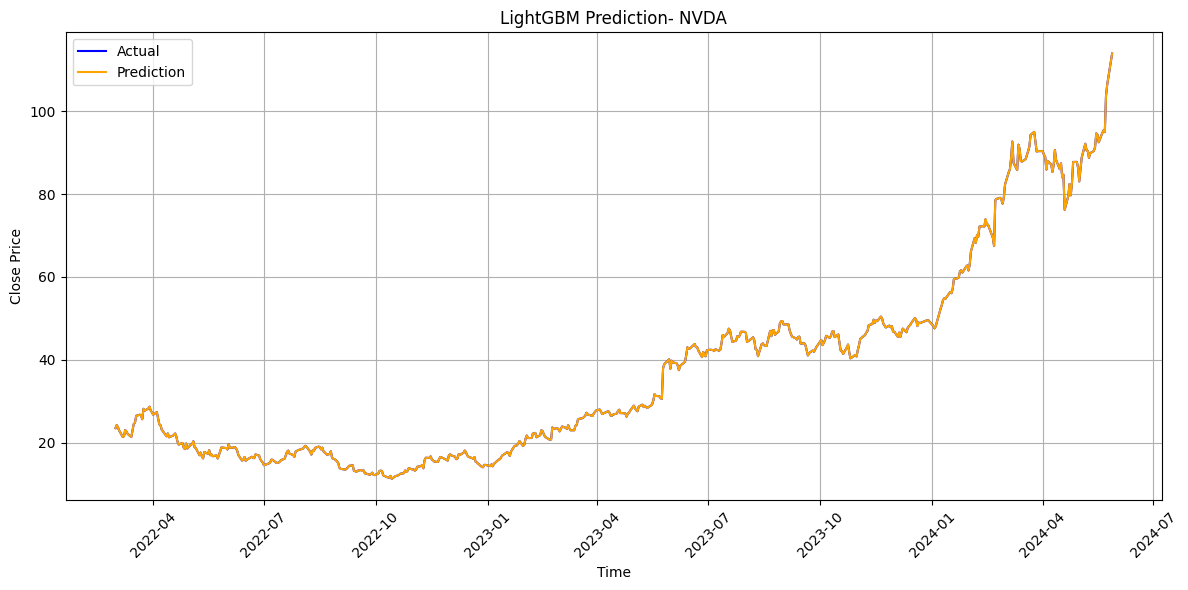

-----------------------------
Test
R2 Value Test:  -8.0795
MSE Test:       1217.8258
RMSE Test:      34.8974
MAE Test:       32.8786
MAPE:           0.2499
-----------------------------


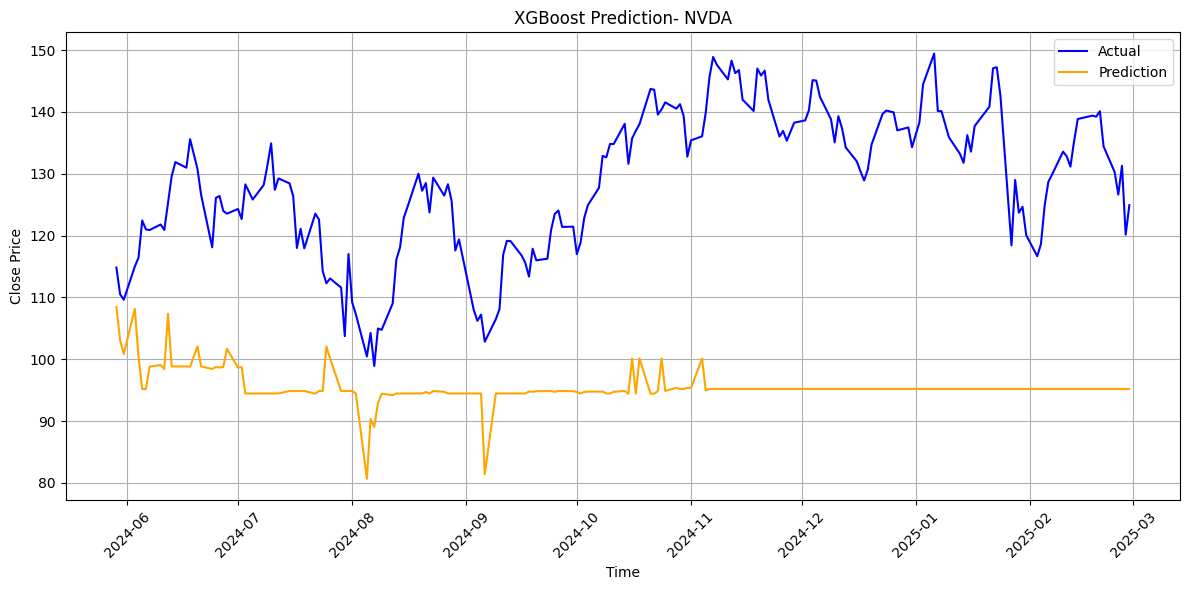

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...),
           date   actual  prediction
 564 2024-05-29  114.825  108.442917
 565 2024-05-30  110.500  103.052544
 566 2024-05-31  109.633  100.852760
 567 2024-06-03  115.000  108.131248
 568 2024-06-04  116.437  100.343361
 ..         ...      ...         ...
 

In [38]:
model_XGBoost(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    learning_rate = 0.2,
    max_depth = 9,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 100,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

-----------------------------
Train
R2 Value Train:  0.9896
MSE Train:       4.4330
RMSE Train:      2.1055
MAE Train:       1.6413
MAPE Train:      0.0137
-----------------------------


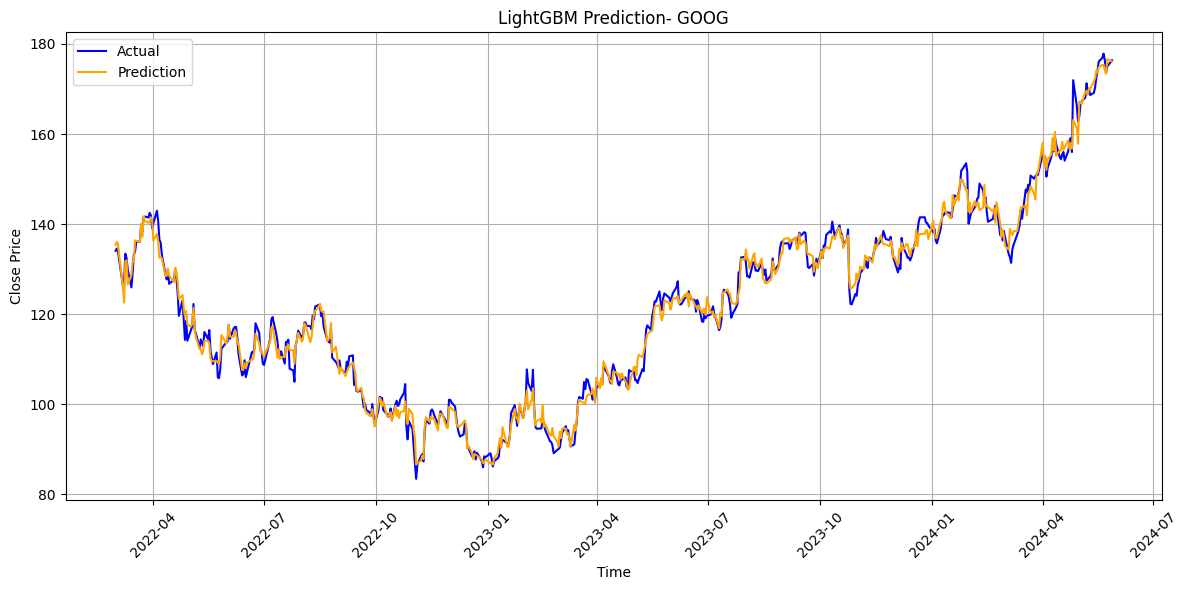

-----------------------------
Test
R2 Value Test:  -1.4487
MSE Test:       397.8245
RMSE Test:      19.9455
MAE Test:       15.4265
MAPE:           0.0848
-----------------------------


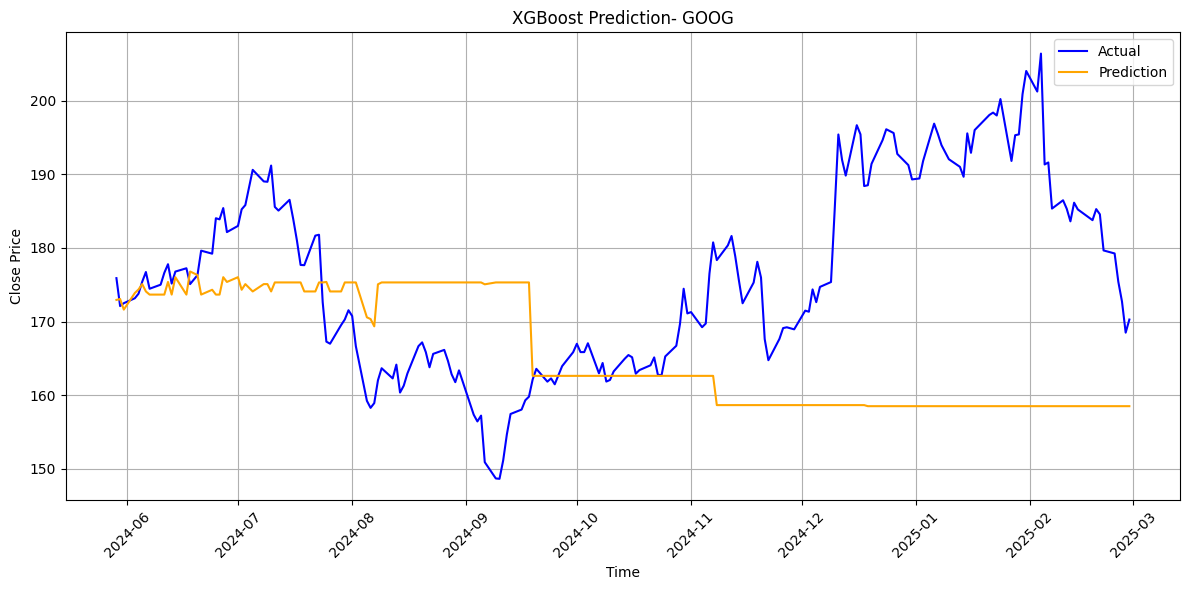

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  175.90  172.943024
 565 2024-05-30  172.11  173.068375
 566 2024-05-31  172.50  171.627365
 567 2024-06-03  173.17  173.882629
 568 2024-06-04  173.79  174.363998
 ..         ...     ...         ...
 748 202

In [39]:
model_XGBoost(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 10,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.1,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#RNN

In [40]:
look_back = 10

Xtrain_META1, ytrain_META1, = [], []
for i in range(len(Xtrain_META) - look_back):
    Xtrain_META1.append(Xtrain_META[i:i + look_back])
    ytrain_META1.append(ytrain_META[i + look_back])

Xtrain_META1, ytrain_META1 = np.array(Xtrain_META1), np.array(ytrain_META1)

In [41]:
print(Xtrain_META1.shape)
print(ytrain_META1.shape)

(554, 10, 5)
(554,)


In [42]:
XTest_META1, yTest_META1, = [], []
for i in range(len(XTest_META) - look_back):
    XTest_META1.append(XTest_META[i:i + look_back])
    yTest_META1.append(yTest_META.iloc[i + look_back])

XTest_META1, yTest_META1 = np.array(XTest_META1), np.array(yTest_META1)

In [43]:
print(XTest_META1.shape)
print(yTest_META1.shape)

(179, 10, 5)
(179,)


In [44]:
Xtrain_AAPL1, ytrain_AAPL1 = [], []
for i in range(len(Xtrain_AAPL) - look_back):
    Xtrain_AAPL1.append(Xtrain_AAPL[i:i + look_back])
    ytrain_AAPL1.append(ytrain_AAPL[i + look_back])

Xtrain_AAPL1, ytrain_AAPL1 = np.array(Xtrain_AAPL1), np.array(ytrain_AAPL1)

In [45]:
XTest_AAPL1, yTest_AAPL1, = [], []
for i in range(len(XTest_AAPL) - look_back):
    XTest_AAPL1.append(XTest_AAPL[i:i + look_back])
    yTest_AAPL1.append(yTest_AAPL.iloc[i + look_back])

XTest_AAPL1, yTest_AAPL1 = np.array(XTest_AAPL1), np.array(yTest_AAPL1)

In [46]:
print(Xtrain_AAPL1.shape)
print(ytrain_AAPL1.shape)
print(XTest_AAPL1.shape)
print(yTest_AAPL1.shape)

(554, 10, 3)
(554,)
(179, 10, 3)
(179,)


In [47]:
Xtrain_MSFT1, ytrain_MSFT1 = [], []
for i in range(len(Xtrain_MSFT) - look_back):
    Xtrain_MSFT1.append(Xtrain_MSFT[i:i + look_back])
    ytrain_MSFT1.append(ytrain_MSFT[i + look_back])

Xtrain_MSFT1, ytrain_MSFT1 = np.array(Xtrain_MSFT1), np.array(ytrain_MSFT1)

In [48]:
XTest_MSFT1, yTest_MSFT1, = [], []
for i in range(len(XTest_MSFT) - look_back):
    XTest_MSFT1.append(XTest_MSFT[i:i + look_back])
    yTest_MSFT1.append(yTest_MSFT.iloc[i + look_back])

XTest_MSFT1, yTest_MSFT1 = np.array(XTest_MSFT1), np.array(yTest_MSFT1)

In [49]:
print(Xtrain_MSFT1.shape)
print(ytrain_MSFT1.shape)
print(XTest_MSFT1.shape)
print(yTest_MSFT1.shape)

(554, 10, 5)
(554,)
(179, 10, 5)
(179,)


In [50]:
Xtrain_NVDA1, ytrain_NVDA1 = [], []
for i in range(len(Xtrain_NVDA) - look_back):
    Xtrain_NVDA1.append(Xtrain_NVDA[i:i + look_back])
    ytrain_NVDA1.append(ytrain_NVDA[i + look_back])

Xtrain_NVDA1, ytrain_NVDA1 = np.array(Xtrain_NVDA1), np.array(ytrain_NVDA1)

In [51]:
XTest_NVDA1, yTest_NVDA1, = [], []
for i in range(len(XTest_NVDA) - look_back):
    XTest_NVDA1.append(XTest_NVDA[i:i + look_back])
    yTest_NVDA1.append(yTest_NVDA.iloc[i + look_back])

XTest_NVDA1, yTest_NVDA1 = np.array(XTest_NVDA1), np.array(yTest_NVDA1)

In [52]:
print(Xtrain_NVDA1.shape)
print(ytrain_NVDA1.shape)
print(XTest_NVDA1.shape)
print(yTest_NVDA1.shape)

(554, 10, 6)
(554,)
(179, 10, 6)
(179,)


In [53]:
Xtrain_GOOG1, ytrain_GOOG1 = [], []
for i in range(len(Xtrain_GOOG) - look_back):
    Xtrain_GOOG1.append(Xtrain_GOOG[i:i + look_back])
    ytrain_GOOG1.append(ytrain_GOOG[i + look_back])

Xtrain_GOOG1, ytrain_GOOG1 = np.array(Xtrain_GOOG1), np.array(ytrain_GOOG1)

In [54]:
XTest_GOOG1, yTest_GOOG1, = [], []
for i in range(len(XTest_GOOG) - look_back):
    XTest_GOOG1.append(XTest_GOOG[i:i + look_back])
    yTest_GOOG1.append(yTest_GOOG.iloc[i + look_back])

XTest_GOOG1, yTest_GOOG1 = np.array(XTest_GOOG1), np.array(yTest_GOOG1)

In [55]:
print(Xtrain_GOOG1.shape)
print(ytrain_GOOG1.shape)
print(XTest_GOOG1.shape)
print(yTest_GOOG1.shape)

(554, 10, 6)
(554,)
(179, 10, 6)
(179,)


##Model

In [56]:
def model_RNN(X_train, y_train, X_test, y_test, neurons, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(SimpleRNN(units=neurons, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'RNN Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_RNN_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9841
MSE Train:       216.6676
RMSE Train:      14.7196
MAE Train:       11.8549
MAPE Train:      0.0530
-----------------------------


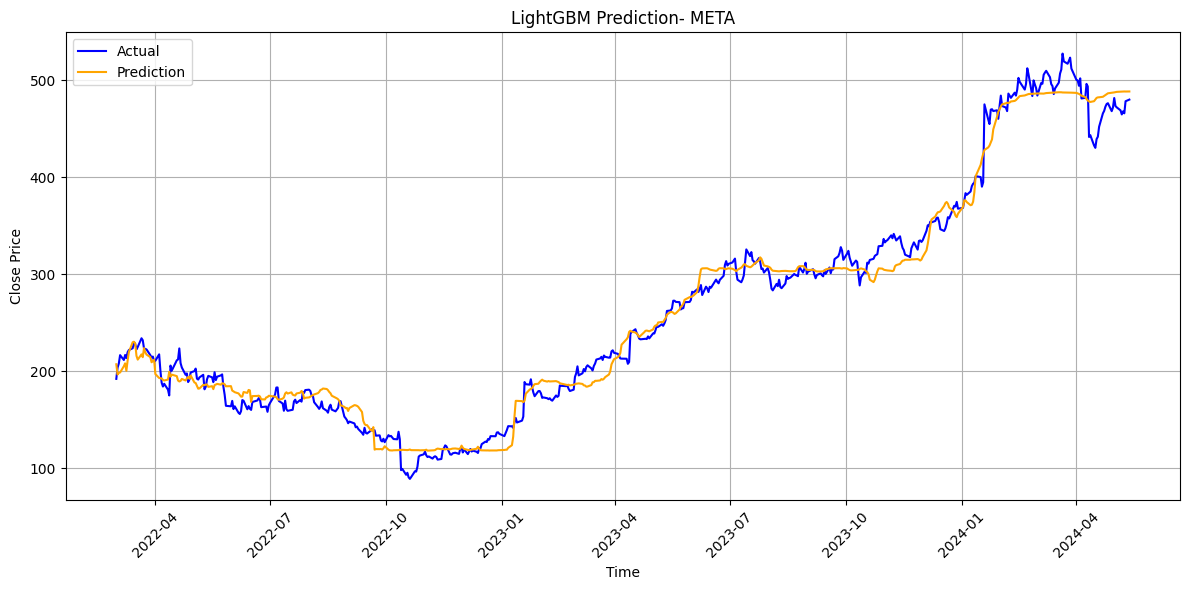

-----------------------------
Test
R2 Value Test:  -1.6049
MSE Test:       11118.7685
RMSE Test:      105.4456
MAE Test:       85.4547
MAPE:           0.1395
-----------------------------


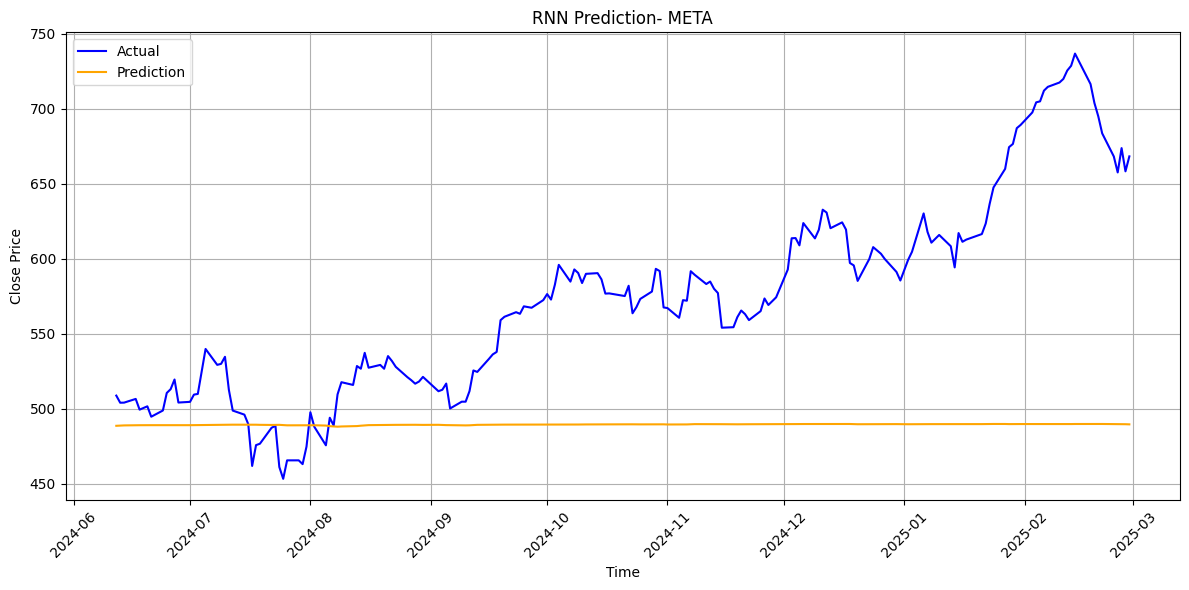

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7a270e34f1a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  508.84  488.727753
 575 2024-06-13  504.10  488.886414
 576 2024-06-14  504.16  488.987152
 577 2024-06-17  506.63  489.033142
 578 2024-06-18  499.49  489.116516
 ..         ...     ...         ...
 748 2025-02-24  668.13  489.867676
 749 2025-02-25  657.50  489.824921
 750 2025-02-26  673.70  489.782654
 751 2025-02-27  658.24  489.779205
 752 2025-02-28  668.20  489.686523
 
 [179 rows x 3 columns])

In [57]:
model_RNN(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    neurons= 256,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.8426
MSE Train:       52.2308
RMSE Train:      7.2271
MAE Train:       6.0000
MAPE Train:      0.0370
-----------------------------


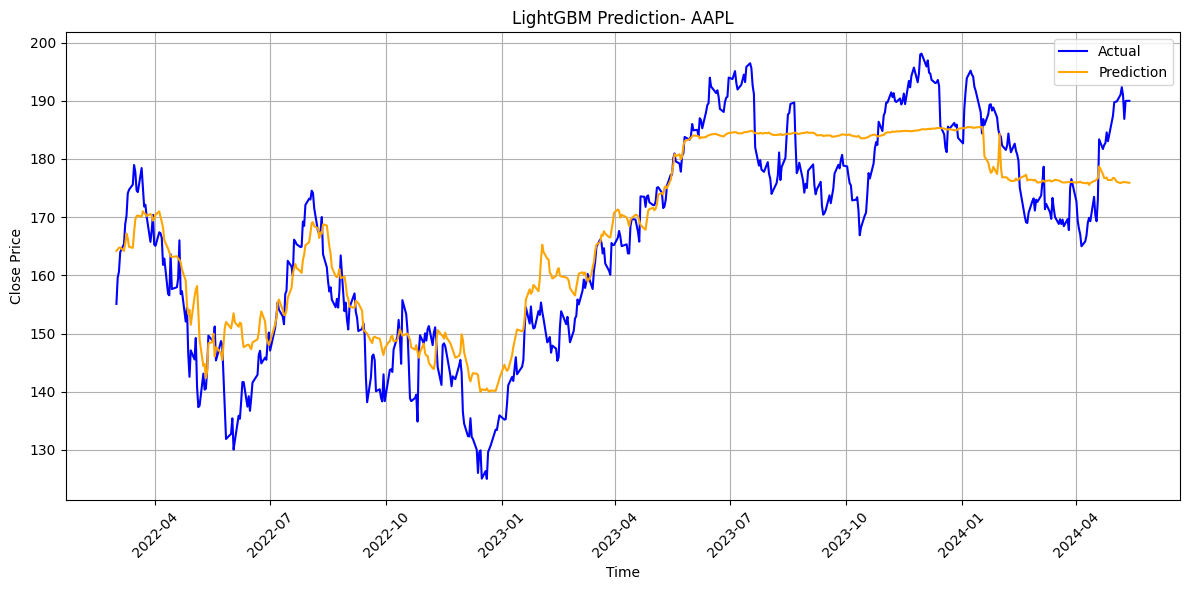

-----------------------------
Test
R2 Value Test:  -72.0290
MSE Test:       8931.6628
RMSE Test:      94.5075
MAE Test:       86.3899
MAPE:           0.3704
-----------------------------


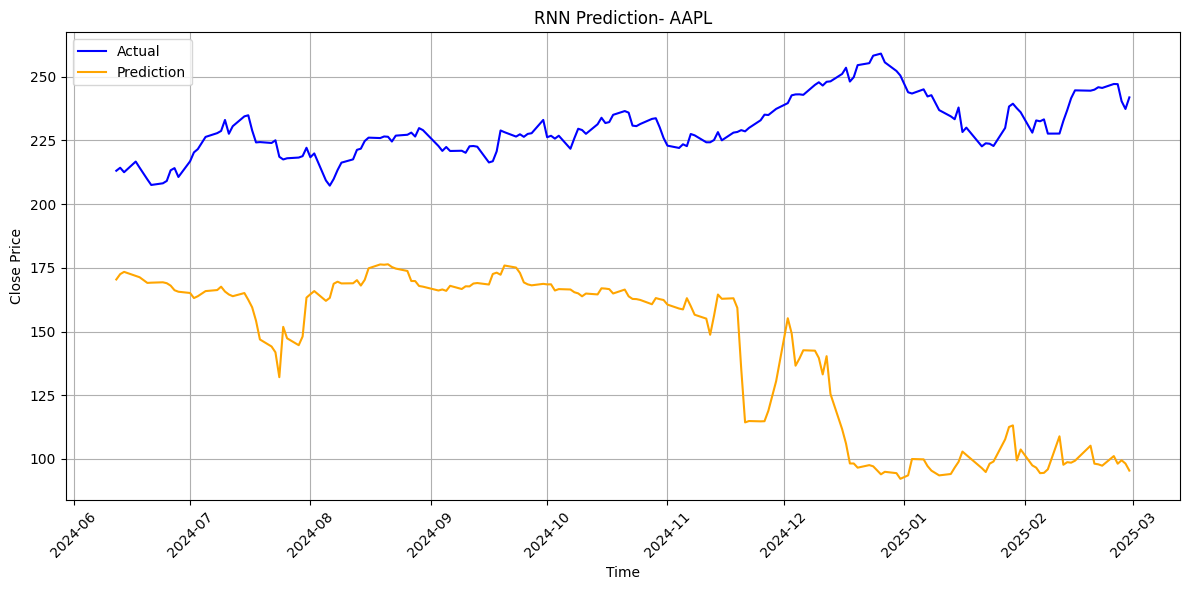

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7a270cf40cc0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  170.414505
 575 2024-06-13  214.24  172.515335
 576 2024-06-14  212.49  173.403091
 577 2024-06-17  216.67  171.801407
 578 2024-06-18  214.29  171.294327
 ..         ...     ...         ...
 748 2025-02-24  247.10  101.147705
 749 2025-02-25  247.04   98.147667
 750 2025-02-26  240.36   99.498306
 751 2025-02-27  237.30   98.208496
 752 2025-02-28  241.84   95.450363
 
 [179 rows x 3 columns])

In [58]:
model_RNN(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    neurons= 256,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.7733
MSE Train:       824.9806
RMSE Train:      28.7225
MAE Train:       23.5599
MAPE Train:      0.0739
-----------------------------


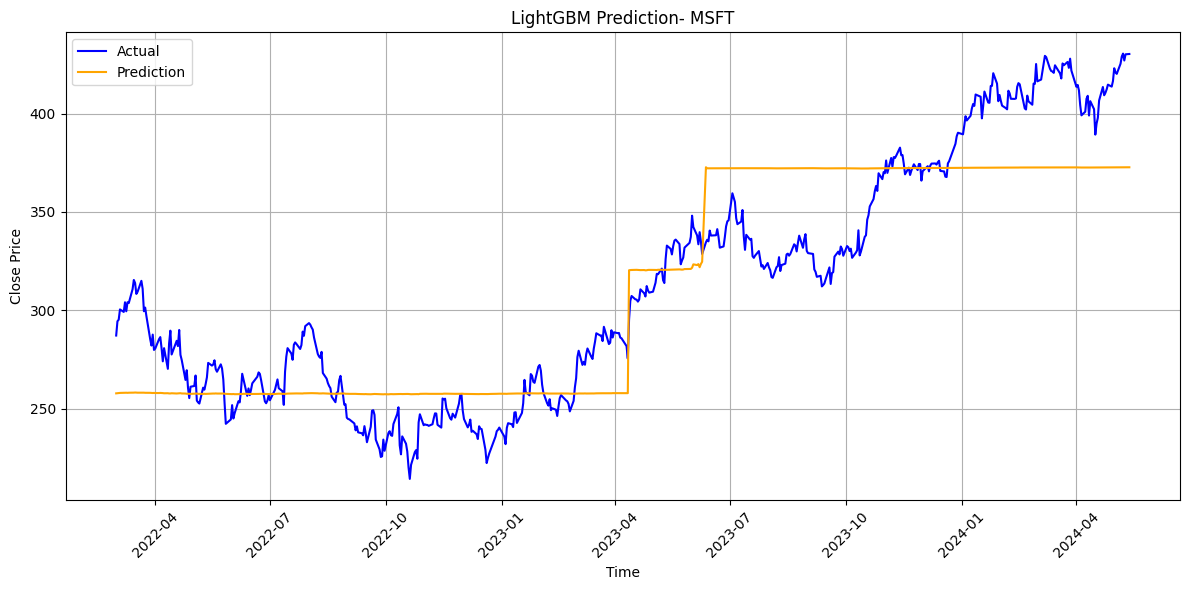

-----------------------------
Test
R2 Value Test:  -11.2586
MSE Test:       3108.6388
RMSE Test:      55.7552
MAE Test:       53.4334
MAPE:           0.1241
-----------------------------


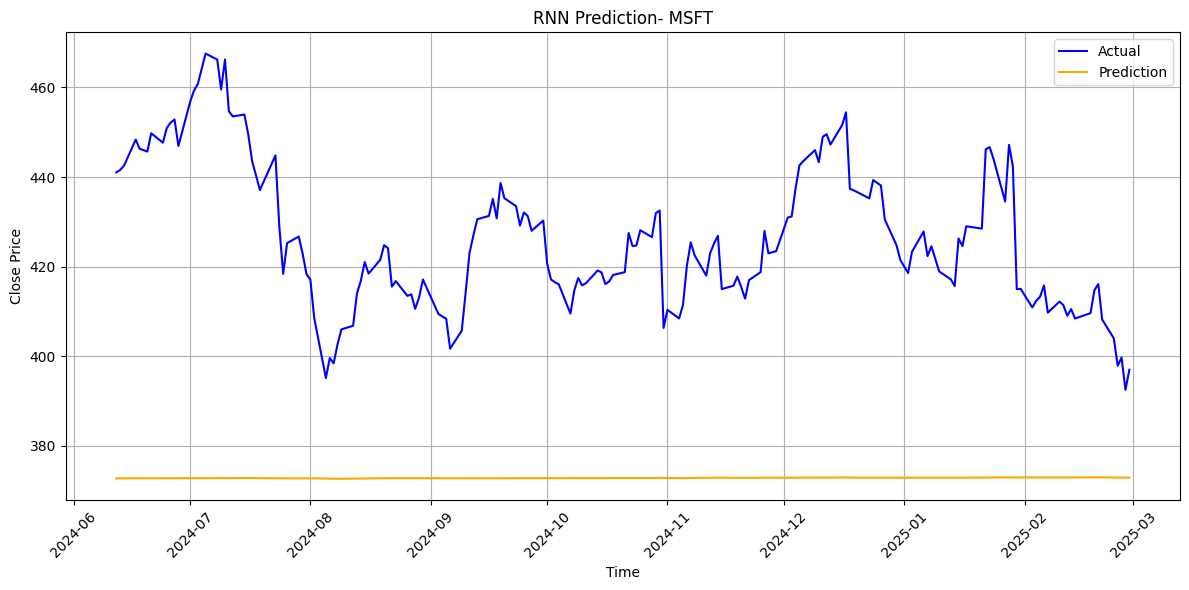

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7a270c3b19e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  372.748962
 575 2024-06-13  441.58  372.761139
 576 2024-06-14  442.57  372.769409
 577 2024-06-17  448.37  372.773193
 578 2024-06-18  446.34  372.785492
 ..         ...     ...         ...
 748 2025-02-24  404.00  372.971771
 749 2025-02-25  397.90  372.955200
 750 2025-02-26  399.73  372.940521
 751 2025-02-27  392.53  372.932404
 752 2025-02-28  396.99  372.908173
 
 [179 rows x 3 columns])

In [59]:
model_RNN(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9839
MSE Train:       9.1643
RMSE Train:      3.0273
MAE Train:       1.9880
MAPE Train:      0.0575
-----------------------------


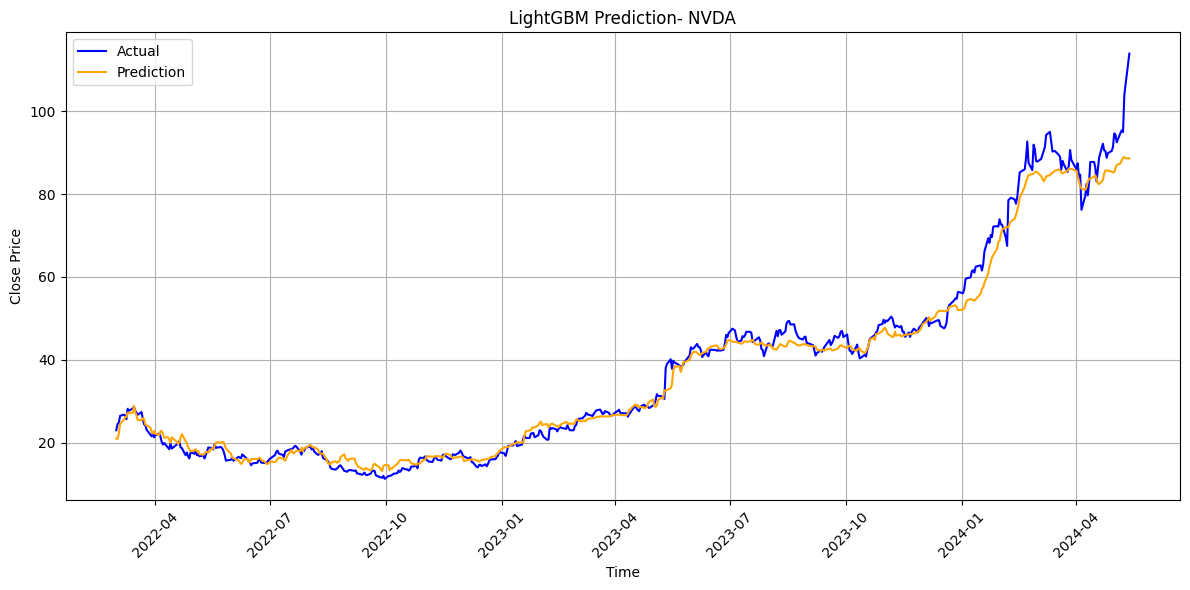

-----------------------------
Test
R2 Value Test:  -8.9785
MSE Test:       1329.3958
RMSE Test:      36.4609
MAE Test:       35.1152
MAPE:           0.2673
-----------------------------


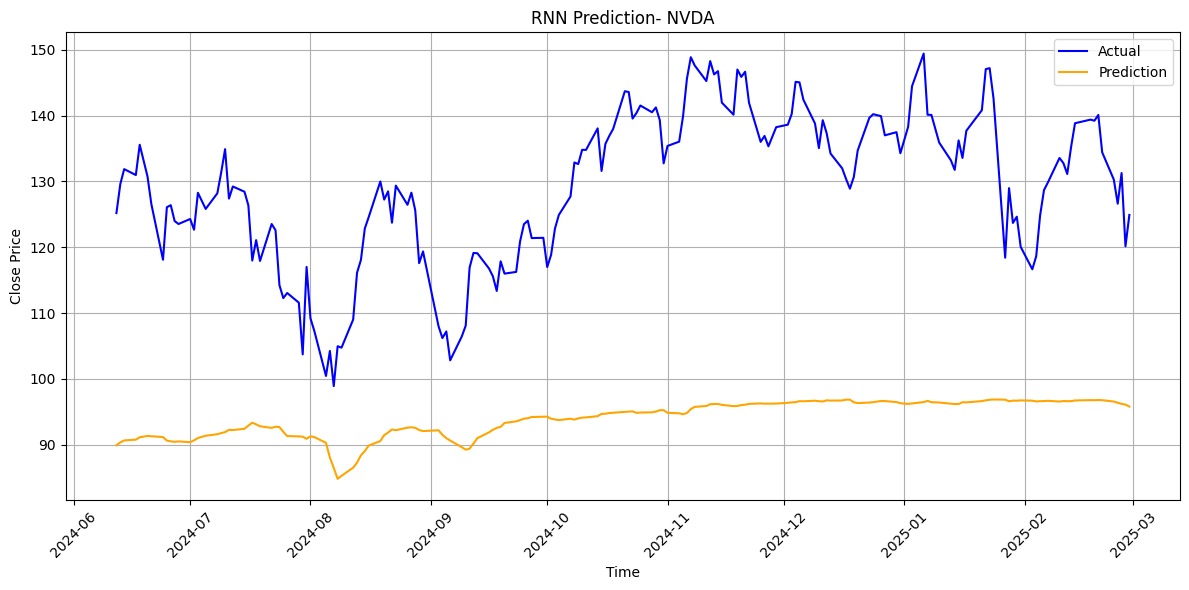

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7a27080b2d40>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  125.20   89.926033
 575 2024-06-13  129.61   90.361870
 576 2024-06-14  131.88   90.654793
 577 2024-06-17  130.98   90.778595
 578 2024-06-18  135.58   91.135193
 ..         ...     ...         ...
 748 2025-02-24  130.28   96.564697
 749 2025-02-25  126.63   96.383682
 750 2025-02-26  131.28   96.202362
 751 2025-02-27  120.15   96.098755
 752 2025-02-28  124.92   95.803307
 
 [179 rows x 3 columns])

In [60]:
model_RNN(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    neurons= 128,
    batch_size = 16,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9419
MSE Train:       25.1319
RMSE Train:      5.0132
MAE Train:       4.0786
MAPE Train:      0.0348
-----------------------------


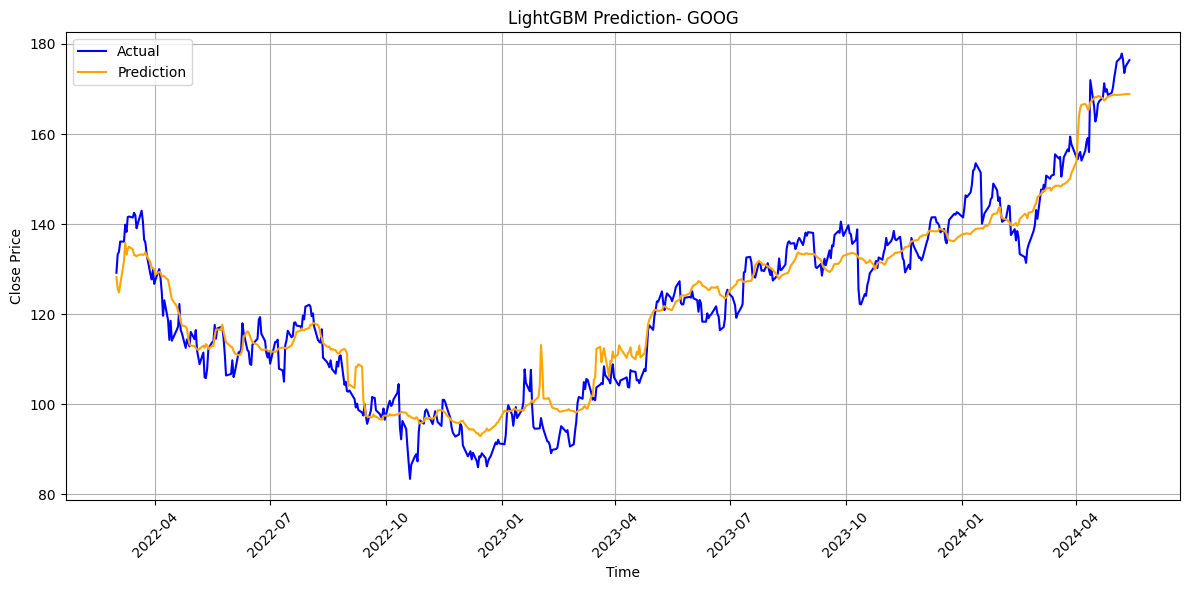

-----------------------------
Test
R2 Value Test:  -0.6163
MSE Test:       276.8854
RMSE Test:      16.6399
MAE Test:       13.2023
MAPE:           0.0721
-----------------------------


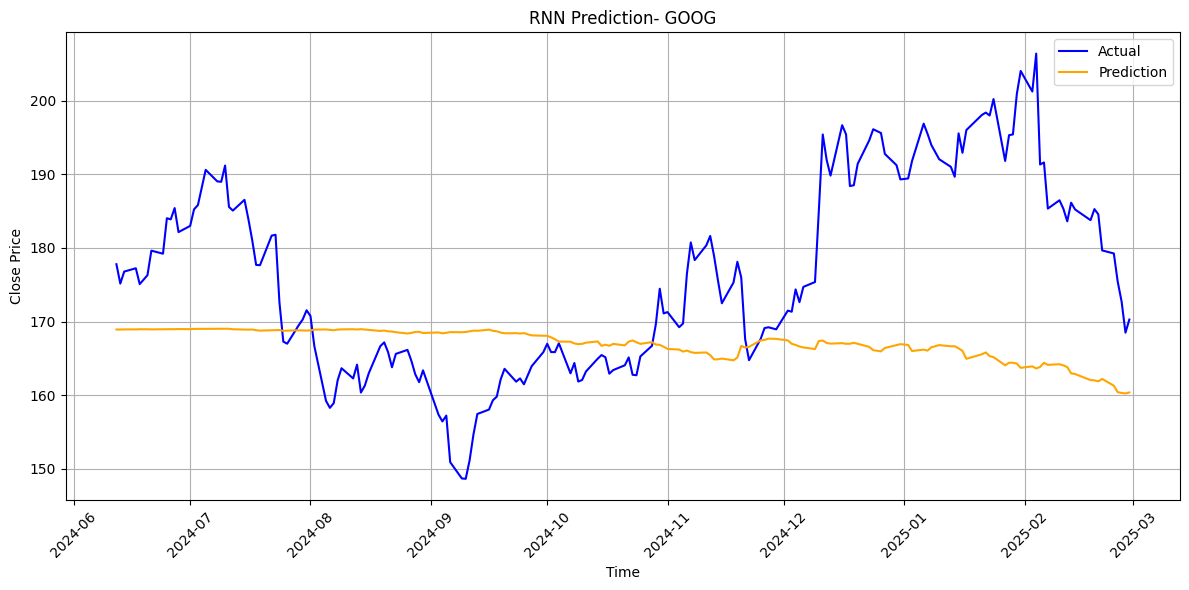

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7a270efe1bc0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  177.79  168.925827
 575 2024-06-13  175.16  168.925049
 576 2024-06-14  176.79  168.941132
 577 2024-06-17  177.24  168.941025
 578 2024-06-18  175.09  168.958084
 ..         ...     ...         ...
 748 2025-02-24  179.25  161.298264
 749 2025-02-25  175.42  160.417221
 750 2025-02-26  172.73  160.319321
 751 2025-02-27  168.50  160.246262
 752 2025-02-28  170.28  160.382172
 
 [179 rows x 3 columns])

In [61]:
model_RNN(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    neurons= 256,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#GRU

In [62]:
def model_GRU(X_train, y_train, X_test, y_test,neurons, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(GRU(units=neurons, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model


    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'GRU Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GRU_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9839
MSE Train:       220.0988
RMSE Train:      14.8357
MAE Train:       11.2025
MAPE Train:      0.0461
-----------------------------


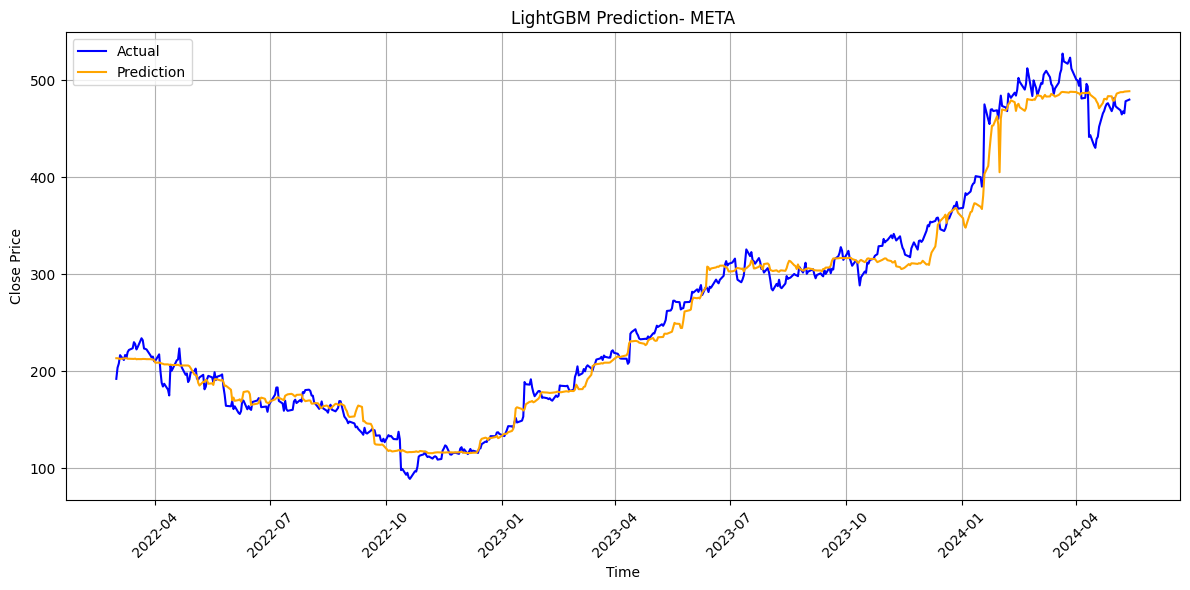

-----------------------------
Test
R2 Value Test:  -1.5387
MSE Test:       10836.3845
RMSE Test:      104.0980
MAE Test:       83.8164
MAPE:           0.1367
-----------------------------


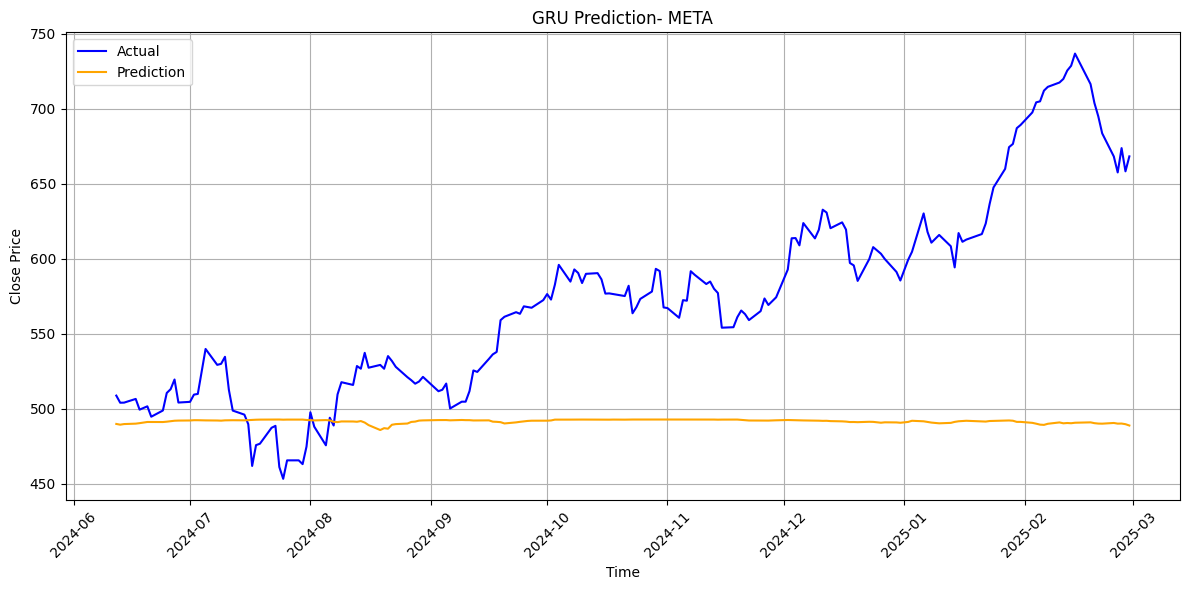

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7a270ff649a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  508.84  489.966309
 575 2024-06-13  504.10  489.467590
 576 2024-06-14  504.16  489.879974
 577 2024-06-17  506.63  490.159149
 578 2024-06-18  499.49  490.493774
 ..         ...     ...         ...
 748 2025-02-24  668.13  490.613220
 749 2025-02-25  657.50  490.173157
 750 2025-02-26  673.70  490.225311
 751 2025-02-27  658.24  489.804108
 752 2025-02-28  668.20  488.915436
 
 [179 rows x 3 columns])

In [63]:
model_GRU(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    neurons= 512,
    batch_size = 16,
    epochs = 150,
    optimizer = 'RMSprop',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9246
MSE Train:       25.0120
RMSE Train:      5.0012
MAE Train:       4.2112
MAPE Train:      0.0254
-----------------------------


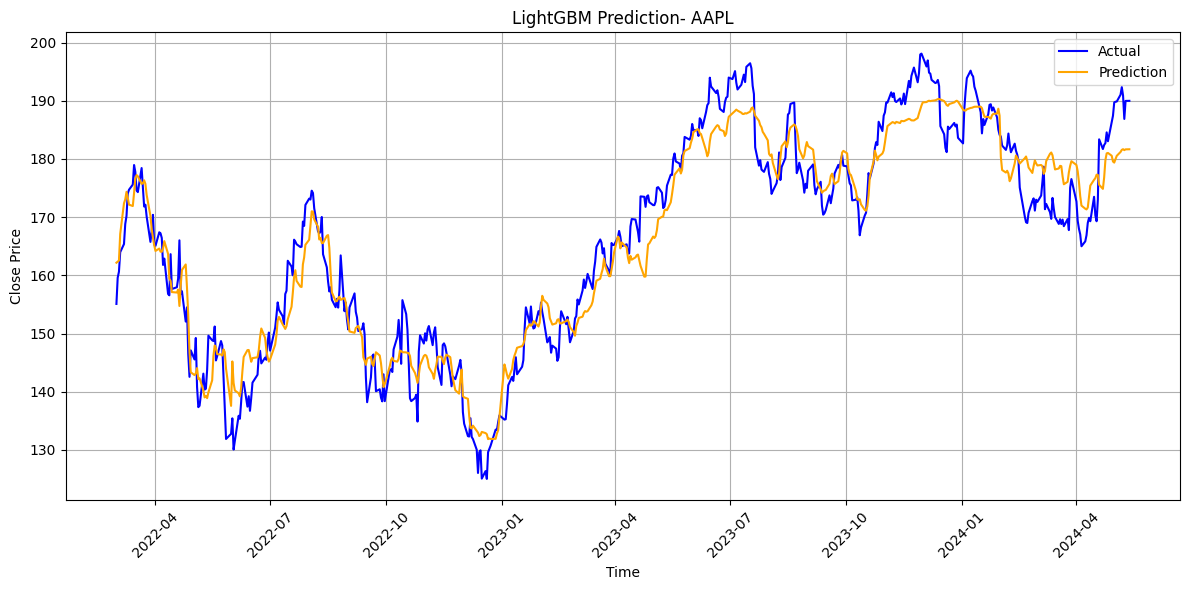

-----------------------------
Test
R2 Value Test:  -16.8445
MSE Test:       2182.4399
RMSE Test:      46.7166
MAE Test:       45.5241
MAPE:           0.1964
-----------------------------


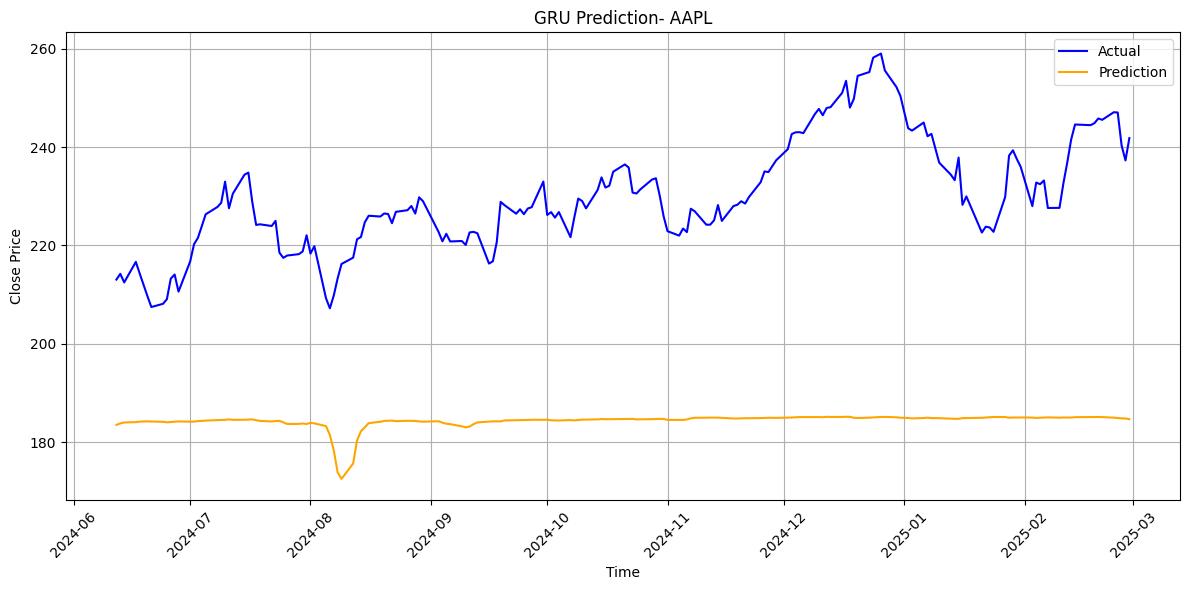

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7a27103c13a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  183.519821
 575 2024-06-13  214.24  183.822540
 576 2024-06-14  212.49  184.017151
 577 2024-06-17  216.67  184.080002
 578 2024-06-18  214.29  184.190094
 ..         ...     ...         ...
 748 2025-02-24  247.10  184.994019
 749 2025-02-25  247.04  184.915283
 750 2025-02-26  240.36  184.843628
 751 2025-02-27  237.30  184.833588
 752 2025-02-28  241.84  184.679153
 
 [179 rows x 3 columns])

In [64]:
model_GRU(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Nadam',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9675
MSE Train:       118.2389
RMSE Train:      10.8738
MAE Train:       8.0677
MAPE Train:      0.0254
-----------------------------


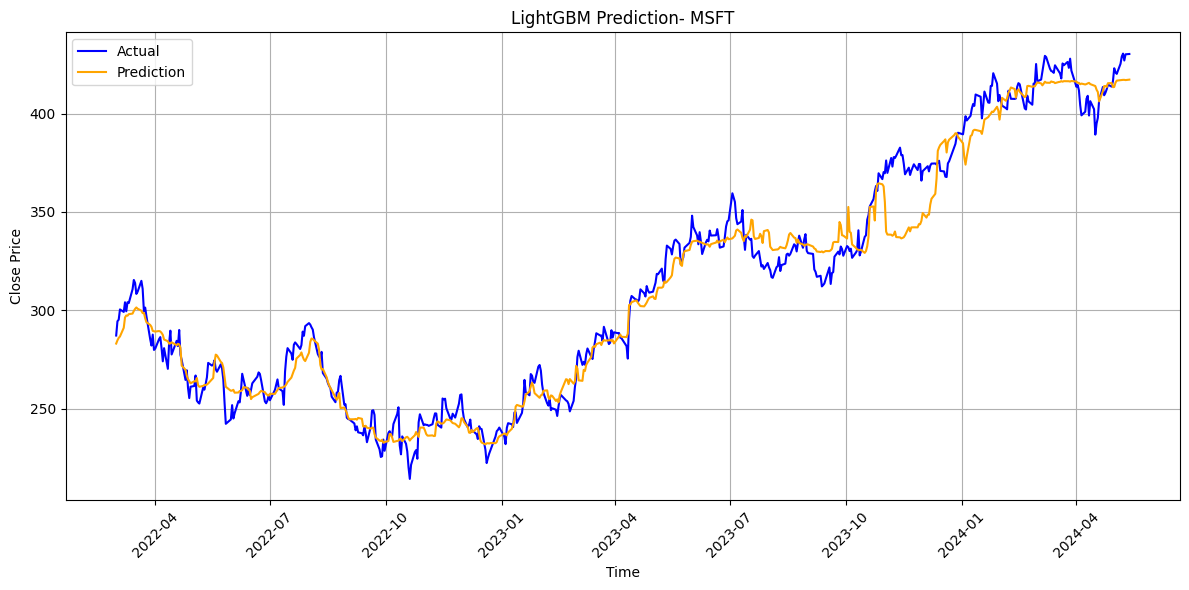

-----------------------------
Test
R2 Value Test:  -0.2230
MSE Test:       310.1320
RMSE Test:      17.6106
MAE Test:       13.3178
MAPE:           0.0306
-----------------------------


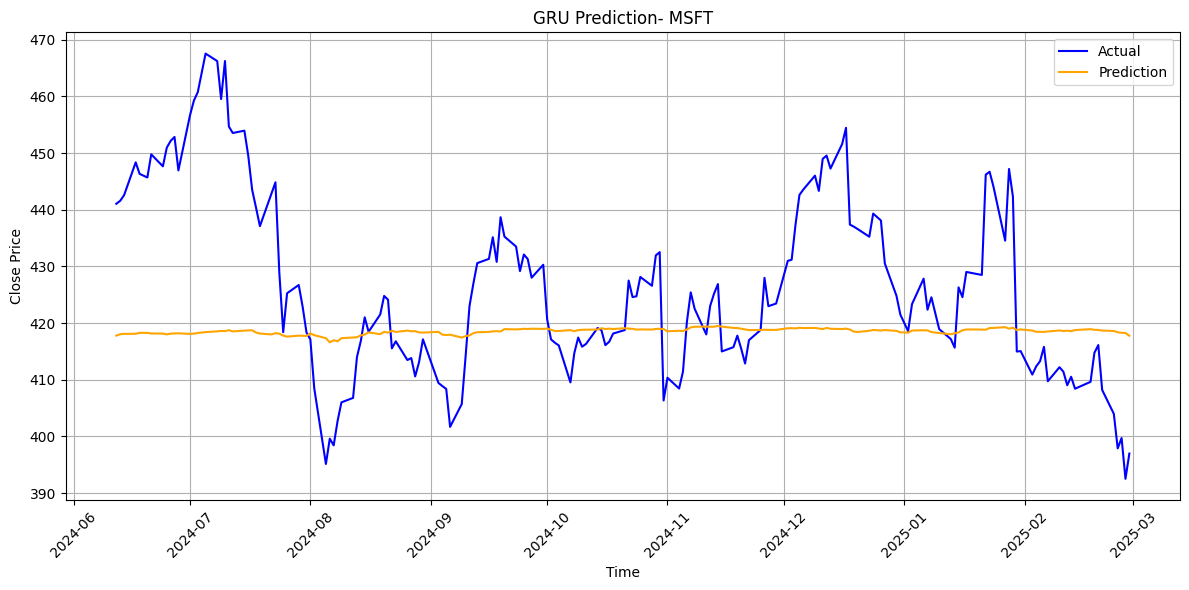

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7a270e773d80>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  417.798523
 575 2024-06-13  441.58  418.042389
 576 2024-06-14  442.57  418.104370
 577 2024-06-17  448.37  418.122681
 578 2024-06-18  446.34  418.290039
 ..         ...     ...         ...
 748 2025-02-24  404.00  418.617065
 749 2025-02-25  397.90  418.395203
 750 2025-02-26  399.73  418.285278
 751 2025-02-27  392.53  418.260895
 752 2025-02-28  396.99  417.782837
 
 [179 rows x 3 columns])

In [65]:
model_GRU(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9913
MSE Train:       4.9595
RMSE Train:      2.2270
MAE Train:       1.4013
MAPE Train:      0.0370
-----------------------------


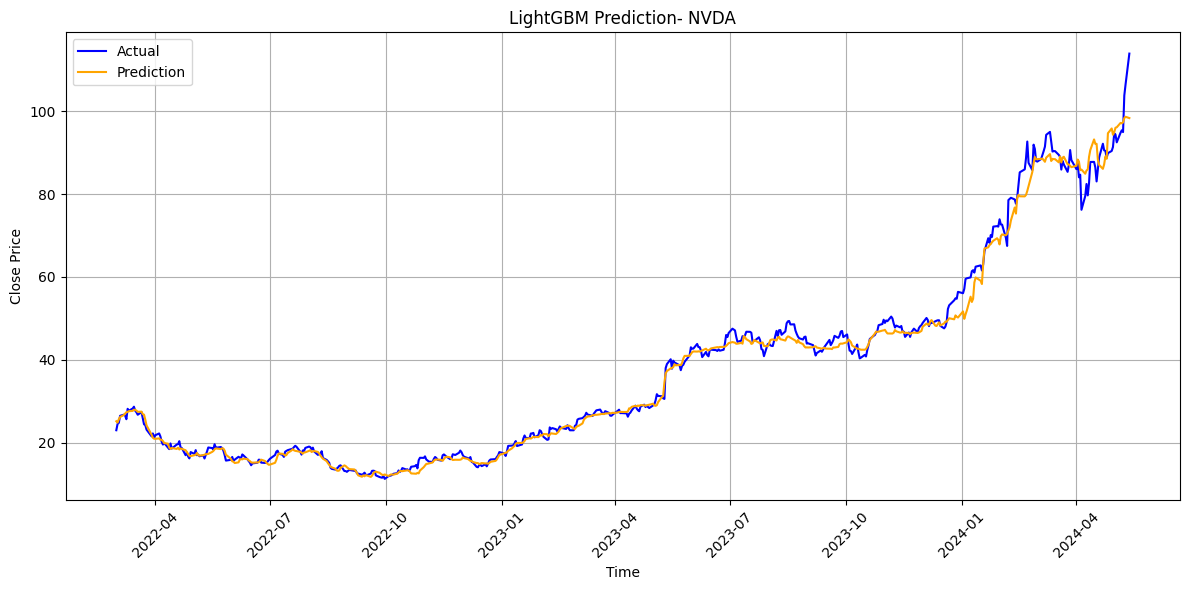

-----------------------------
Test
R2 Value Test:  -10.0651
MSE Test:       1474.1544
RMSE Test:      38.3947
MAE Test:       35.6414
MAPE:           0.2689
-----------------------------


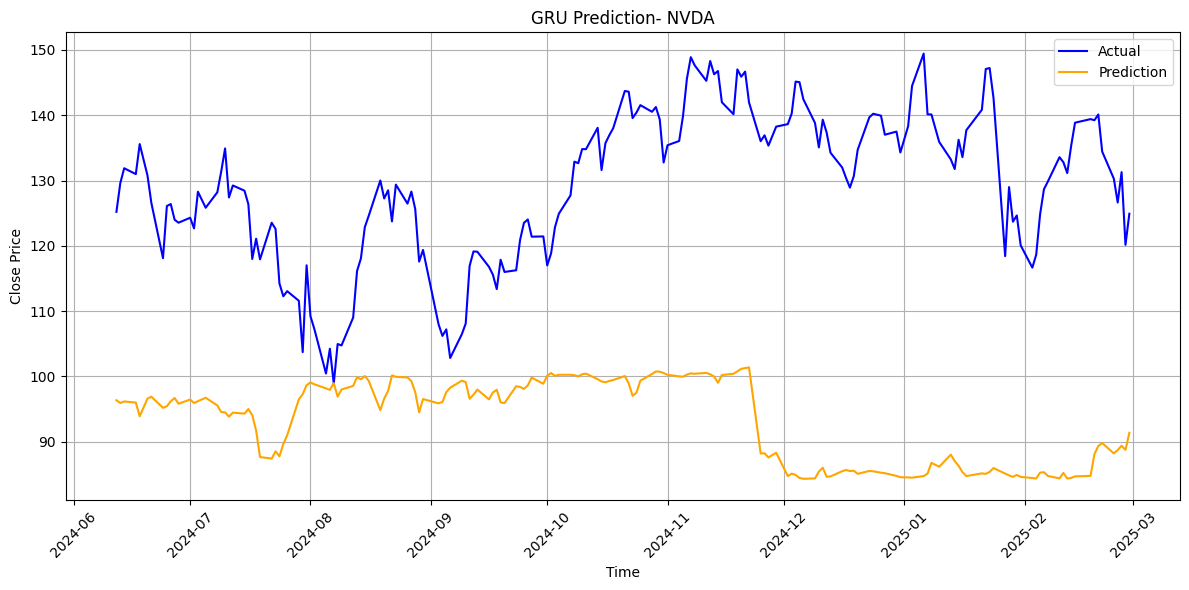

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7a270eb95260>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  125.20   96.364380
 575 2024-06-13  129.61   95.939690
 576 2024-06-14  131.88   96.179237
 577 2024-06-17  130.98   96.002304
 578 2024-06-18  135.58   93.901474
 ..         ...     ...         ...
 748 2025-02-24  130.28   88.222664
 749 2025-02-25  126.63   88.738029
 750 2025-02-26  131.28   89.383057
 751 2025-02-27  120.15   88.762169
 752 2025-02-28  124.92   91.376602
 
 [179 rows x 3 columns])

In [66]:
model_GRU(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9656
MSE Train:       14.8553
RMSE Train:      3.8543
MAE Train:       3.0535
MAPE Train:      0.0257
-----------------------------


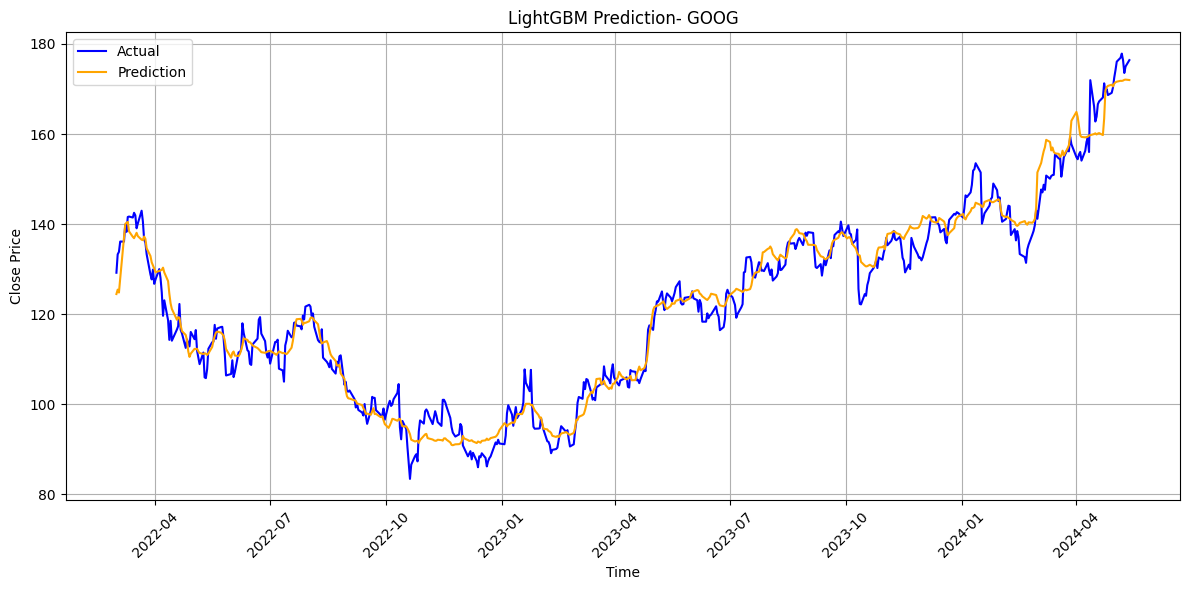

-----------------------------
Test
R2 Value Test:  -0.0402
MSE Test:       178.1900
RMSE Test:      13.3488
MAE Test:       11.3520
MAPE:           0.0636
-----------------------------


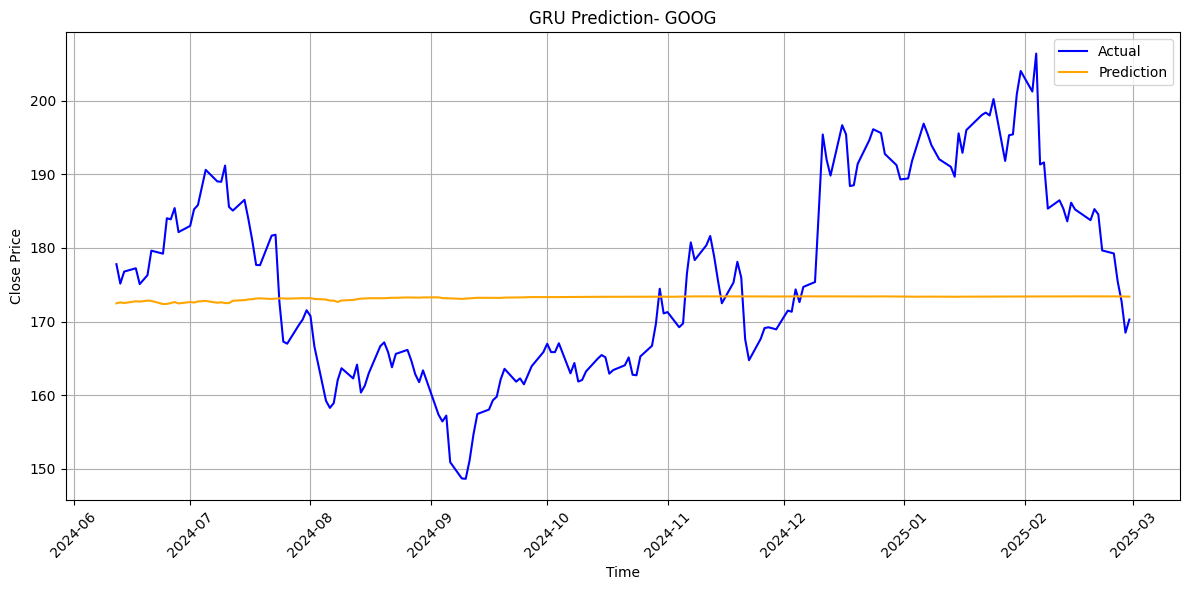

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7a270bf4e160>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  177.79  172.483536
 575 2024-06-13  175.16  172.610657
 576 2024-06-14  176.79  172.526962
 577 2024-06-17  177.24  172.757629
 578 2024-06-18  175.09  172.714554
 ..         ...     ...         ...
 748 2025-02-24  179.25  173.422928
 749 2025-02-25  175.42  173.418350
 750 2025-02-26  172.73  173.410629
 751 2025-02-27  168.50  173.412842
 752 2025-02-28  170.28  173.393997
 
 [179 rows x 3 columns])

In [67]:
model_GRU(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    neurons= 256,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#LSTM

In [68]:
def model_LSTM(X_train, y_train, X_test, y_test, neurons, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(LSTM(units=neurons, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LSTM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_LSTM_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9871
MSE Train:       175.8393
RMSE Train:      13.2604
MAE Train:       9.7280
MAPE Train:      0.0412
-----------------------------


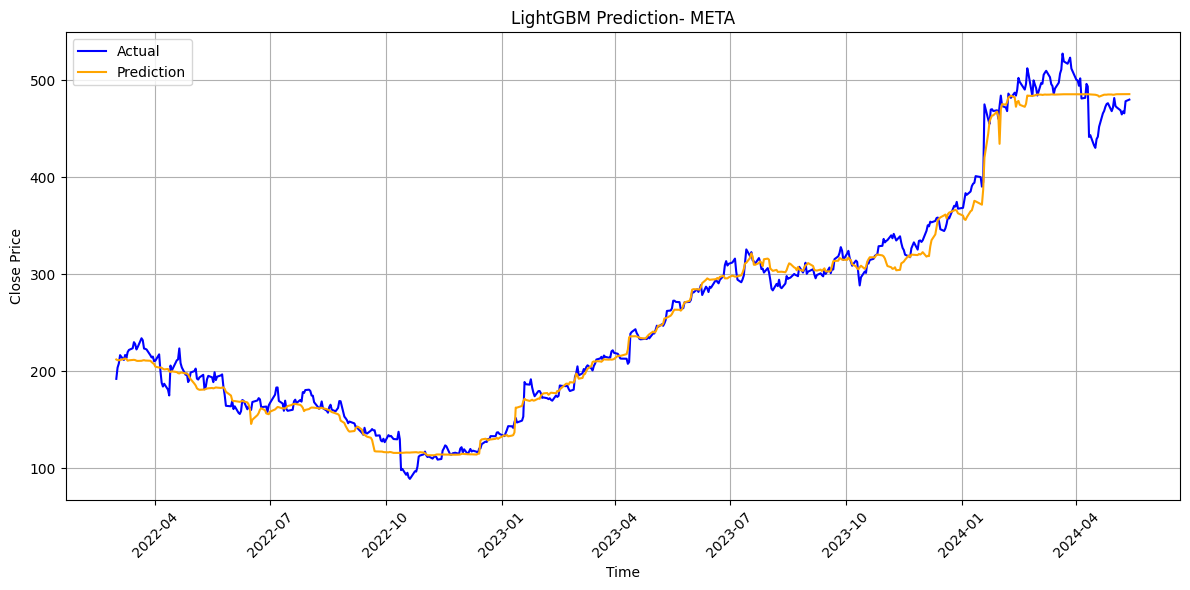

-----------------------------
Test
R2 Value Test:  -2.1112
MSE Test:       13280.1657
RMSE Test:      115.2396
MAE Test:       93.1308
MAPE:           0.1519
-----------------------------


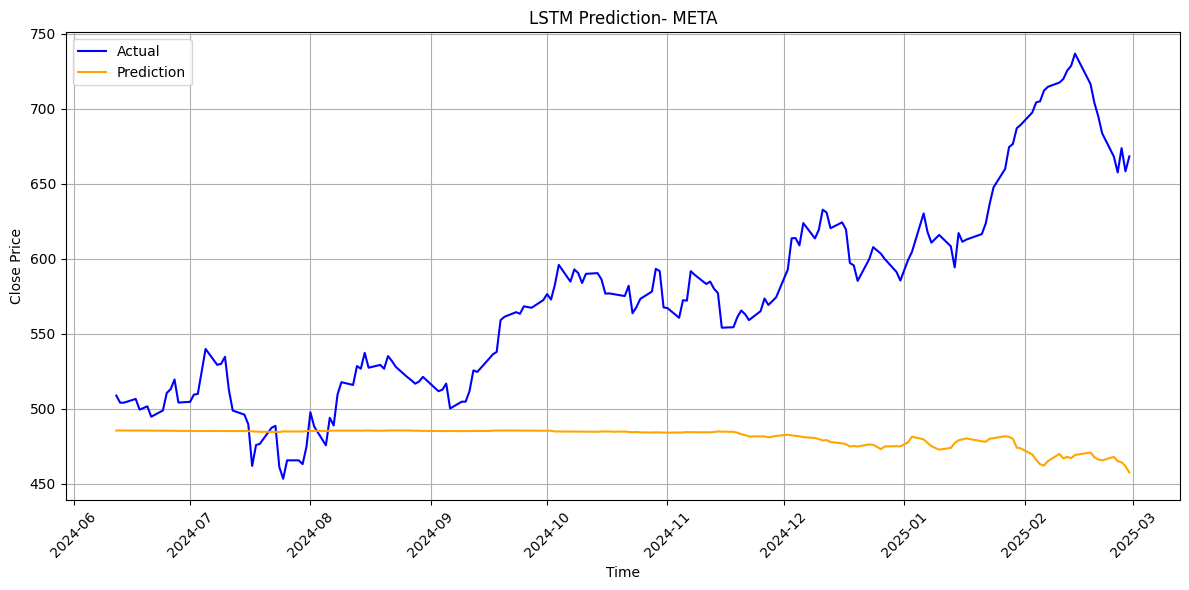

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7a26e84658a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  508.84  485.582031
 575 2024-06-13  504.10  485.588470
 576 2024-06-14  504.16  485.580933
 577 2024-06-17  506.63  485.575897
 578 2024-06-18  499.49  485.560425
 ..         ...     ...         ...
 748 2025-02-24  668.13  468.031891
 749 2025-02-25  657.50  465.124908
 750 2025-02-26  673.70  464.420929
 751 2025-02-27  658.24  461.822327
 752 2025-02-28  668.20  457.646912
 
 [179 rows x 3 columns])

In [69]:
model_LSTM(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    neurons= 256,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.8278
MSE Train:       57.1463
RMSE Train:      7.5595
MAE Train:       6.2066
MAPE Train:      0.0376
-----------------------------


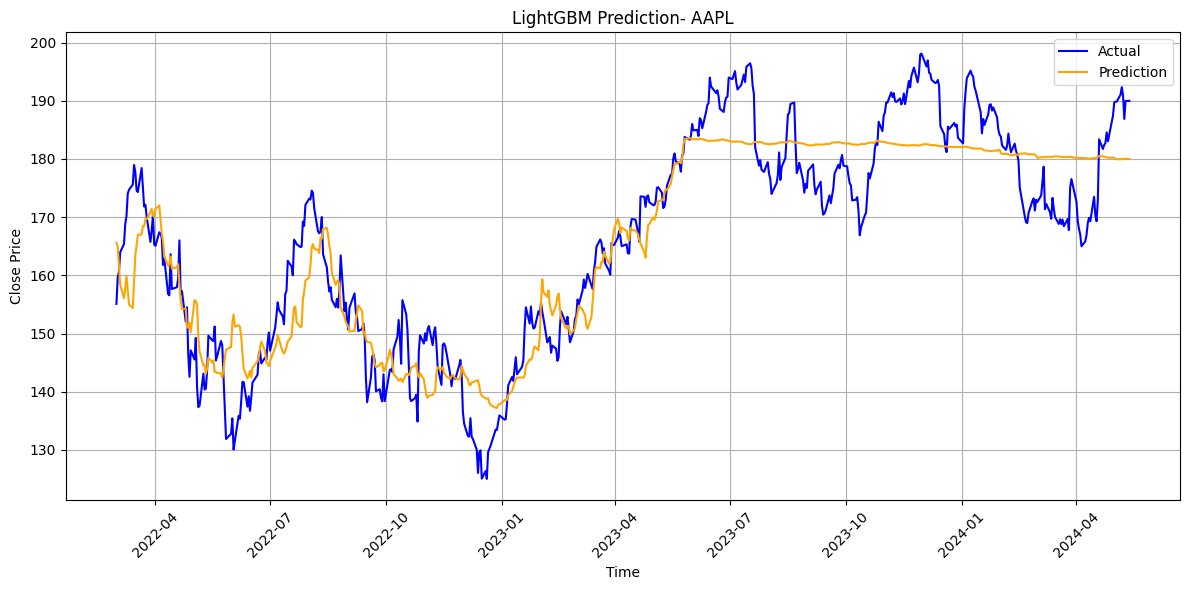

-----------------------------
Test
R2 Value Test:  -20.6697
MSE Test:       2650.2639
RMSE Test:      51.4807
MAE Test:       50.2581
MAPE:           0.2169
-----------------------------


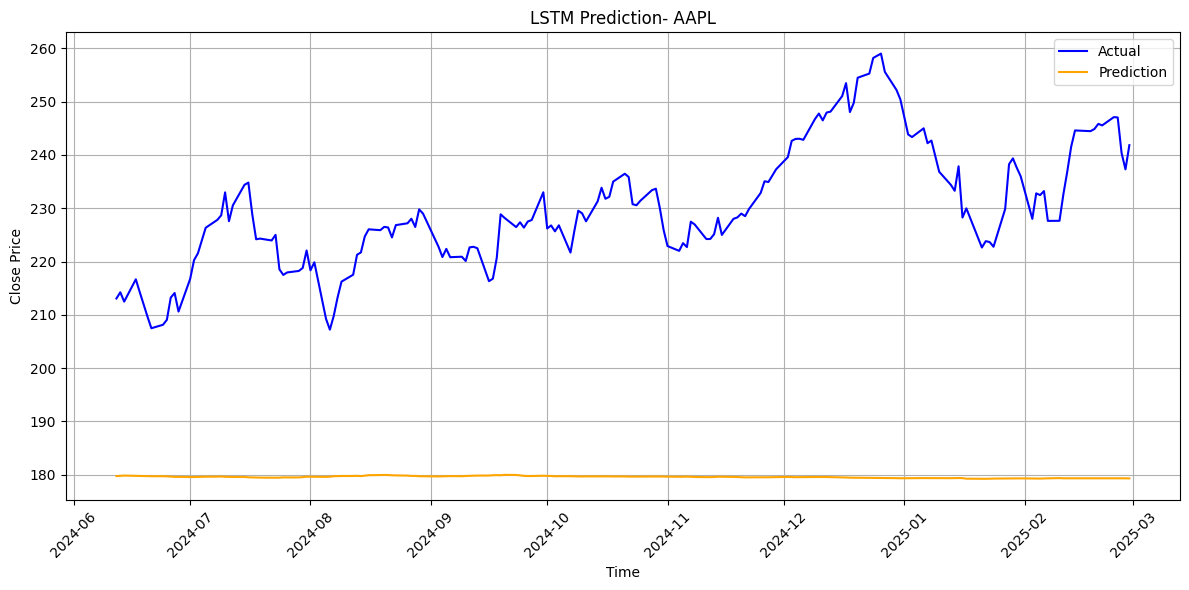

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7a26e8495080>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  179.747208
 575 2024-06-13  214.24  179.793076
 576 2024-06-14  212.49  179.847794
 577 2024-06-17  216.67  179.791245
 578 2024-06-18  214.29  179.767090
 ..         ...     ...         ...
 748 2025-02-24  247.10  179.349426
 749 2025-02-25  247.04  179.344971
 750 2025-02-26  240.36  179.353348
 751 2025-02-27  237.30  179.333344
 752 2025-02-28  241.84  179.315277
 
 [179 rows x 3 columns])

In [70]:
model_LSTM(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    neurons= 512,
    batch_size = 32,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9471
MSE Train:       192.4075
RMSE Train:      13.8711
MAE Train:       11.0326
MAPE Train:      0.0364
-----------------------------


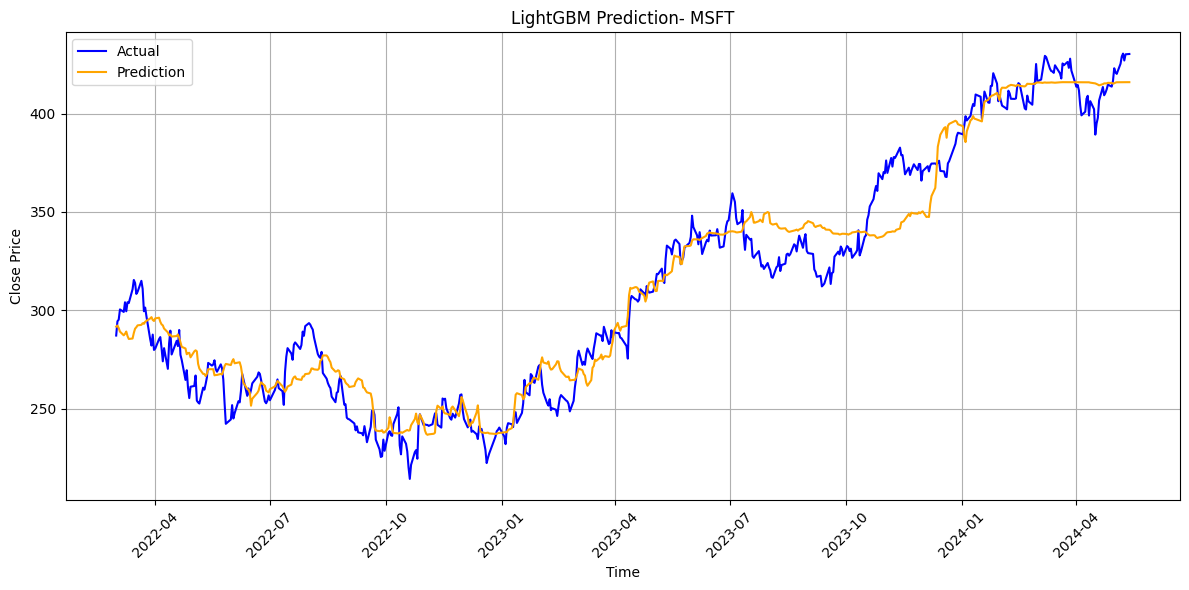

-----------------------------
Test
R2 Value Test:  -0.8569
MSE Test:       470.8824
RMSE Test:      21.6998
MAE Test:       17.0618
MAPE:           0.0391
-----------------------------


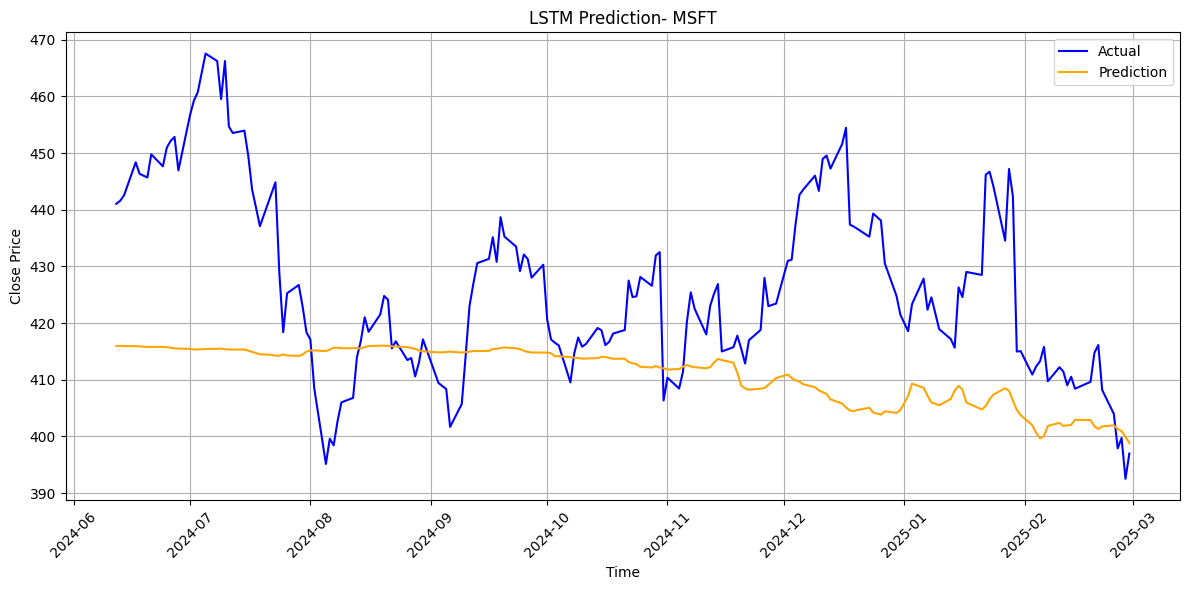

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7a26e0536f20>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  415.965027
 575 2024-06-13  441.58  415.982544
 576 2024-06-14  442.57  415.955261
 577 2024-06-17  448.37  415.932983
 578 2024-06-18  446.34  415.889801
 ..         ...     ...         ...
 748 2025-02-24  404.00  401.958679
 749 2025-02-25  397.90  401.322205
 750 2025-02-26  399.73  400.953400
 751 2025-02-27  392.53  399.938232
 752 2025-02-28  396.99  398.849243
 
 [179 rows x 3 columns])

In [71]:
model_LSTM(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9810
MSE Train:       10.8329
RMSE Train:      3.2913
MAE Train:       2.2253
MAPE Train:      0.0643
-----------------------------


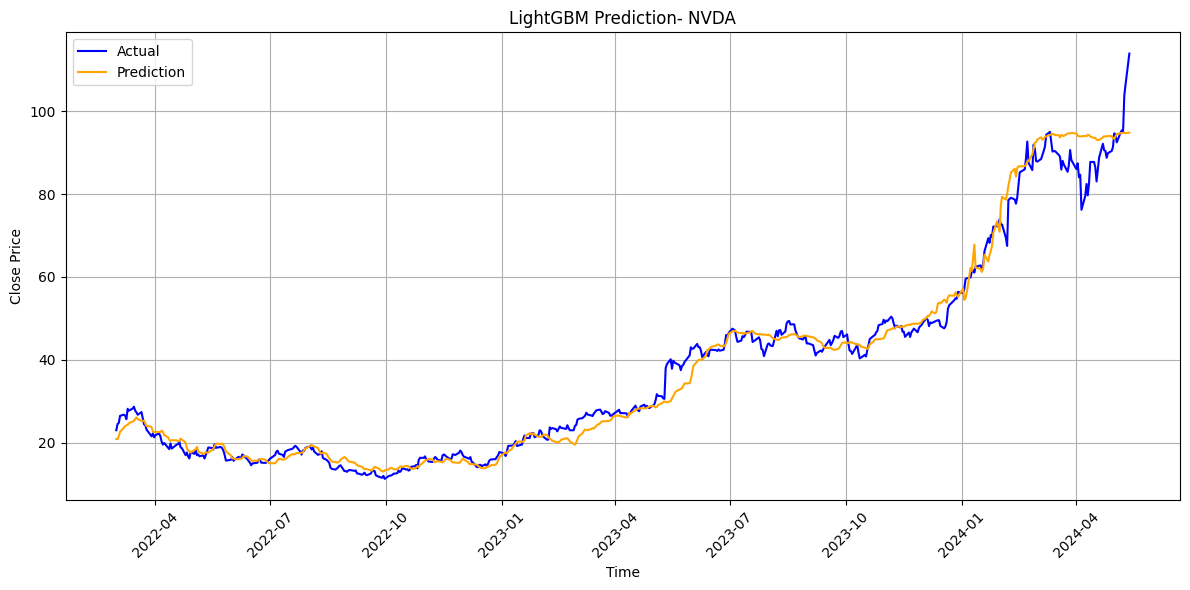

-----------------------------
Test
R2 Value Test:  -7.7871
MSE Test:       1170.6708
RMSE Test:      34.2151
MAE Test:       32.4510
MAPE:           0.2456
-----------------------------


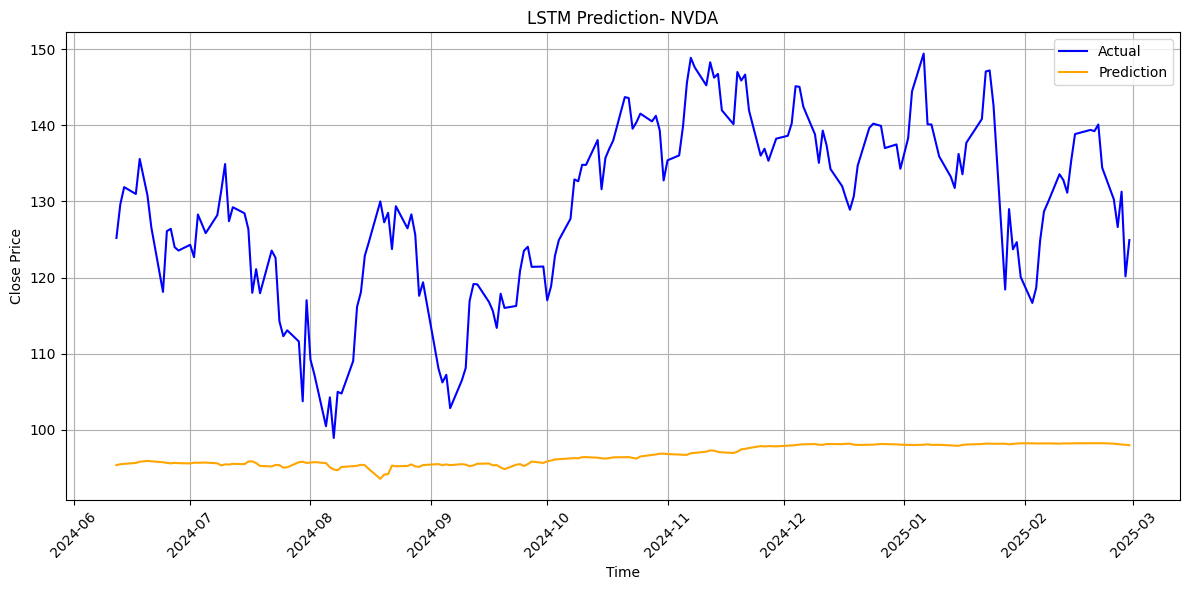

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7a26e80f8f40>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  125.20   95.341995
 575 2024-06-13  129.61   95.459610
 576 2024-06-14  131.88   95.505791
 577 2024-06-17  130.98   95.625404
 578 2024-06-18  135.58   95.789040
 ..         ...     ...         ...
 748 2025-02-24  130.28   98.160744
 749 2025-02-25  126.63   98.109802
 750 2025-02-26  131.28   98.045921
 751 2025-02-27  120.15   98.022964
 752 2025-02-28  124.92   97.950188
 
 [179 rows x 3 columns])

In [72]:
model_LSTM(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    neurons= 512,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.8982
MSE Train:       44.0223
RMSE Train:      6.6349
MAE Train:       4.4831
MAPE Train:      0.0375
-----------------------------


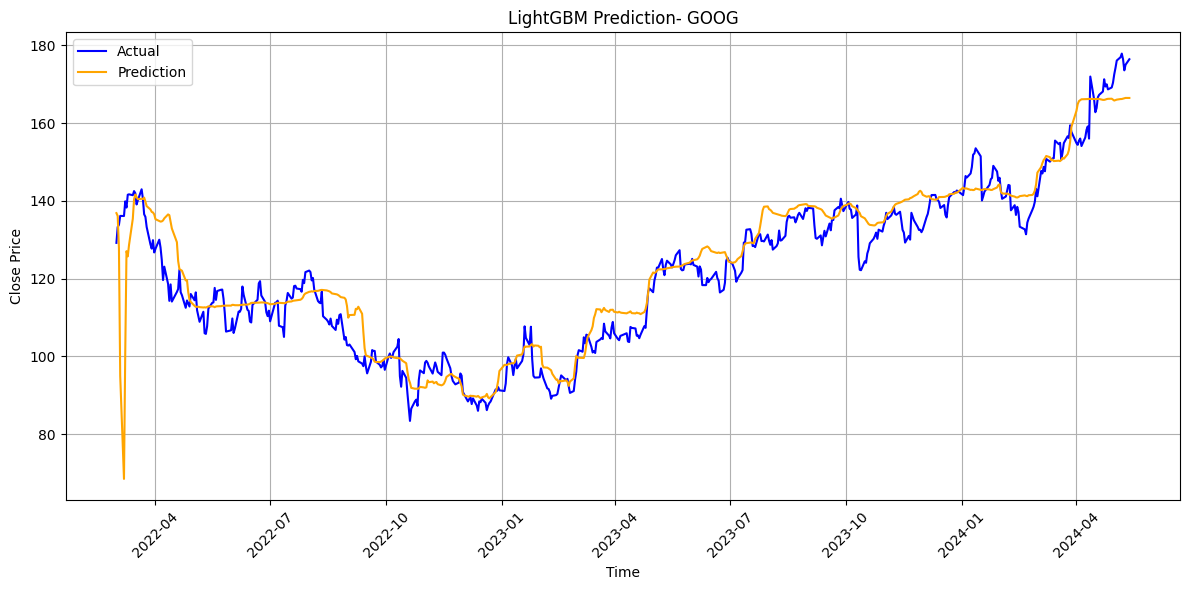

-----------------------------
Test
R2 Value Test:  -4.2868
MSE Test:       905.6664
RMSE Test:      30.0943
MAE Test:       22.4953
MAPE:           0.1221
-----------------------------


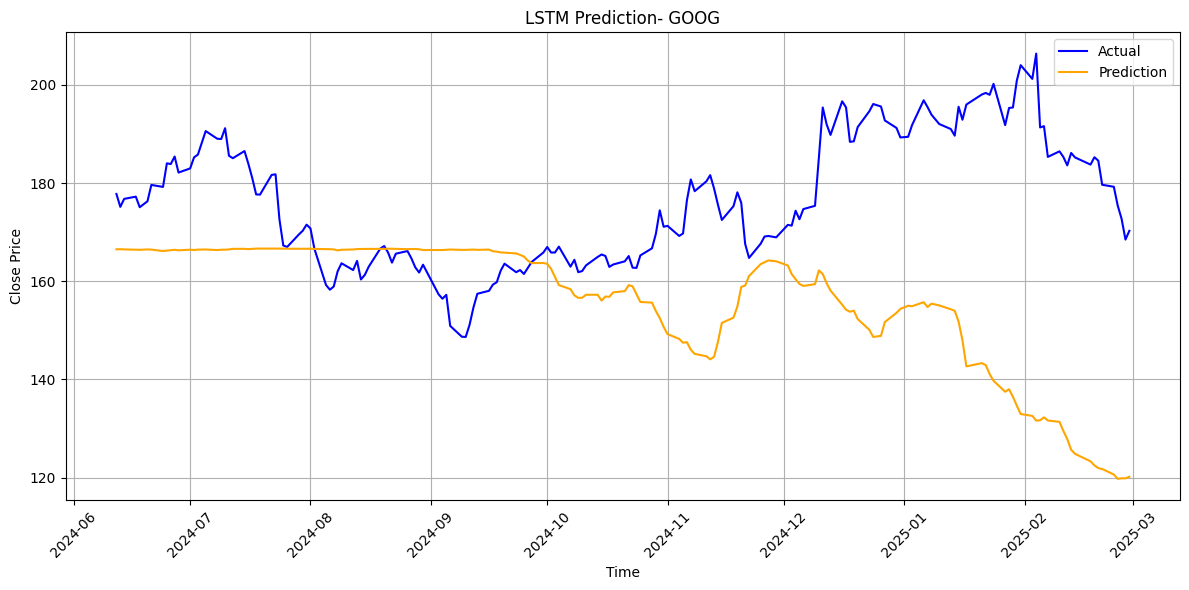

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7a26e0668540>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  177.79  166.516602
 575 2024-06-13  175.16  166.536697
 576 2024-06-14  176.79  166.498108
 577 2024-06-17  177.24  166.432281
 578 2024-06-18  175.09  166.411148
 ..         ...     ...         ...
 748 2025-02-24  179.25  120.640213
 749 2025-02-25  175.42  119.766472
 750 2025-02-26  172.73  119.874817
 751 2025-02-27  168.50  119.860481
 752 2025-02-28  170.28  120.183243
 
 [179 rows x 3 columns])

In [73]:
model_LSTM(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    neurons= 128,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')